#  <a id='1-1'> Exploratory Yelp Data Analysis -- STA 220 Final Project

## Group: Yiming Wu, Zhuowei Chen, Chenghan Sun

## Table of Contents:
* [Section I: Project Overview and Motivations](#first-bullet)
   - [Part I: Motivation of this data science project](#sub1)
   - [Part II: Usage and organization of folder structure](#sub2)
* [Section II: Build Web Crawler ](#second-bullet)
  - [Part I: Web crawling group of cities as analysis object ](#sub3)
  - [Part II: Build Yelp web crawler](#sub4)
* [Section III: Read data from sql server into pandas](#third-bullet)
  - [Part I: Show all tables in merged yelp_all_db](#sub7)
  - [Part II: Read all crawled databases tables into DataFrame](#sub8)
  - [Part III: Data concatenation final form](#sub9)
  - [Part IV: Data cleaning and feature engineering](#sub10)
* [Section IV: Data analysis and visualization](#fourth-bullet)
  - [Part I: Restaurants ratings distribution analysis](#sub11)
  - [Part II: Restaurants categorical analysis](#sub12)
  - [Part III: Restaurants operation hours analysis](#sub13)
  - [Part IV: Top 25 restaurants reviews distribution analysis based on cities](#sub14)
  - [Part V: Restaurants geo-spatial analysis](#fifth-bullet)
  - [Part VI: Other categorical variables analysis¶](#fifth-bullet)
  
* [Section V: Restaurants rating prediction](#fifth-bullet)
* [Section VI: Future works](#sixth-bullet)

## Section I: Project Overview and Motivations <a class="anchor" id="first-bullet"></a>

**Note: This section contains same information as README.md**

### Part I: Motivation of this data science project <a class="anchor" id="sub1"></a>

As we expected, in this era of information exposion, people are keen to use data to reveal underlying patterns and behaviors from macro perspectives. Thus, no surprise that there already existed numerous data science projects which broadly focused on commercial datasets. From another aspect, with the rapid development and implementation of Machine Learning algorithms, majority of these projects heavily focused on data forecasting and general insights, such as conducting sentiment analysis on tweets. However, several questions remained to be answer:

- What if we don't have available datasets? 
    - How should we deal with massive and mixed raw data?
- As data analysts / scientists, how should we explain and deliver the data insights to non-experts?
- Could we optimize the data pipeline and analysis?

These above questions need to be carefully considered before implementation of any Machine Learning algorithms, and play an important role in data science field. Thus, we want to highlight potential solutions and benchmark the above questions in this project:

- Implement web crawler technologies to collect raw dataset
    - Perfrom data cleaning and feature engineering on the crawled dataset
- Perfrom exploratory data analysis and gain data insights using graphical visualization tools
- Create automatic data pipeline through the whole project

In this project, we choose to perform above strategies on Yelp (https://www.yelp.com/) for benchmarking purpose. Yelp is a great data repository which thrives on the numerous descriptive features that are provided by owners of local restaurants. It is of considerable value to analyze Yelp data and find out whether they help in directing the performance of restaurant or whether restaurant performance is indeed dictated by other factors. given the context: 

- **This project is heavily focused on:**
    - 1. Project organization, writeup readability, and overall conclusions
        - This part will be separately explained in the Part II: Usage and organization of folder structure.
    - 2. Code quality, readability, and efficiency
        - We grouped code functionalities by different classes. See details in Part II: Usage and organization of folder structure.
    - 3. Scientific programming and custom algorithms
        - We design and implement many unique algorithms for efficient data processing, details in Folder: Build_Craler and Codebase.
    - 4. Data munging
        - We export data from sql server to DataFrame, and perfromed extensive data munging to perfrom effcient analysis.
    - 5. Data visualization
        - We perfromed data visualization extensively on all features we crawled from Yelp, and made comments on insights in the graphical information.
    - 6. Data extraction
        - We highlight the spirit of web techlogies, especially on wed crawler. We built our own unique code (see Build_Crawler folder) to collect data. In addition, this module could be easily modified to crawl even more data from Yelp, or apply to other websites based on similar principle.
    - 7. Data storage and big data
        - We deigned the data pipeline to store all data into relational database and interact through SQL queries.
    - 8. Statistics and machine learning
        - We provided some modeling (e.g. classification) and highlight the data insights and advice for future works.

### Part II: Usage and organization of folder structure <a class="anchor" id="sub2"></a>

**There are fours major folders in the submitted folder:**
- 1. Notebooks
    - Main_notebook.ipynb:
        - Contains all project introductions, strcutures, explanations, observations and comments, visualizations, modelings and summaries. Please refer this notebook as principal line of the project.
        
        
- 2. Build_Crawler:

    - We built a seperate scrapy-based Yelp web crawling module into this folder. As a individual module, this means it could be easily modified to crawl even more user-specified data from Yelp, or apply this crawling method to other websites based on similar principle. The main class lives in Build_Crawler/Yelp/spiders/YelpSpider.py, and other help classes and pipelines were also built in Build_Crawler/Yelp. We automate the data collection process by implementing SQL queries. All data were automatically stored into local SQL server.  


- 3. Database:
    - We have four sub-folders:
        - yelp_dbs:
            - `yelp_db_1_6.sql` contains information of the following cities:  
            |-----------------------|  
            | Tables_in_yelp_db_1_6 |  
            |-----------------------|  
            | yelp_fresno           |  
            | yelp_los_angeles      |  
            | yelp_sacramento       |  
            | yelp_san_diego        |  
            | yelp_san_francisco    |  
            | yelp_san_jose         |  
            |-----------------------|    
            6 rows in set (0.00 sec) 
            - `yelp_db_7_12.sql` contains information of the following cities:  
            |------------------------|  
            | Tables_in_yelp_db_7_12 |  
            |------------------------|  
            | yelp_Anaheim           |  
            | yelp_Bakersfield       |  
            | yelp_Long_Beach        |  
            | yelp_Oakland           |  
            | yelp_Riverside         |  
            | yelp_Santa_Ana         |  
            |------------------------|   
            6 rows in set (0.00 sec)  
        - cities_csv:
            - Contains information of crawled California city list from https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population. Please refer Section I, Part I for more details. 
        - resource_csv:
            - Contains information of fipsDict downloaded from https://data.world/niccolley/us-zipcode-to-county-state. We map fips code to zip code and corresponding city information. This .csv file will be used in Geo-Spatial analysis in Section III, Part V. 
            
            
- 4. Codebase
    - There following .py file lives in this folder:
        - db_utils.py: Use for database (SQL server) connection and extract data into dataframe for analysis.
        - helper_fe.py: contained all data cleaning and feature engineering.
        - ratdist_plot.py: ratings distribution plots
        - category_plot.py: categorical plots
        - ophrs_plot.py: operation hrs plots
        - helper_ml.py: ML plots


In [2]:
# load pkgs 
import pandas as pd
import sys
import numpy as np
import os
from urllib.request import urlopen
import re
import string
import json
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')
import seaborn as sns
from plotnine import *
from wordcloud import WordCloud 
from pyecharts.charts import Pie
from pyecharts import options as opts
import plotly.express as px

sys.path.insert(0, '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
import pymysql
from bs4 import BeautifulSoup

# Machine Learning pkgs
from sklearn import preprocessing, metrics, neighbors, model_selection, svm, ensemble
import xgboost as xgb

**<span style="color:blue">Import helper classes and functions which lives in `Codebase`.</span>**

In [3]:
# load helper functions from ../Codebase
sys.path.insert(0, '../Codebase/')
from db_utils import YelpDb
from helper_fe import *
from ratdist_plot import RatdistPlot
from category_plot import CategoryPlot
from ophrs_plot import OpHrsPlot
from helper_ml import *

## Section II: Build Web Crawler <a class="anchor" id="second-bullet"></a>

### Part I:  Web crawling group of cities as analysis object <a class="anchor" id="sub3"></a>

First, we need to determine which cities in California should our analysis focused on. The primary concerns were, first, we will need to crawl Yelp website, and based on our trial and error process, **our IP address were easily got banned by Yelp**. So we investigate tremendous amount of time on running the crawler and collect the data, and decide not to crawl too many cities (even if our code could do that). Due to this reason, we only crawled selected cities based on following links:   
- Resource 1: https://patch.com/california/lajolla/ca-cities-rank-among-best-big-cities-live gives best 12 big cities in California, which for sure, worth our attention.  
- Resource 2: https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population gives rank of cities in California based on populations.  

We perfromed the following simple web crawling on this two resources. 

In [4]:
# Resource 1:
# open url connection 
link = 'https://patch.com/california/lajolla/ca-cities-rank-among-best-big-cities-live'
html = urlopen(link).read()
soup = BeautifulSoup(html, features="html5lib")

# use class to narrow search, based on observation 
target_level = soup.find('section', {"class": "article-body"})
target_level_2 = target_level.find_all('ol')[1]
target_level_3 = target_level_2.find_all('li')
cali_cities = []
token_list = []
for info in target_level_3:
    cali_cities.append(info.get_text(strip=True))
for i in cali_cities:
    flag = re.findall("[A-Za-z ]", i)
    if flag:
        token = "".join(flag)
        token_list.append(token)
print(f'The list of best big cities in California are: {token_list[:12]}')

The list of best big cities in California are: ['San Diego ', 'San Francisco ', 'San Jose ', 'Sacramento ', 'Riverside ', 'Los Angeles ', 'Long Beach ', 'Anaheim ', 'Bakersfield ', 'Oakland ', 'Santa Ana ', 'Fresno ']


In [5]:
# Resource 2:
link = 'https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population'
html = urlopen(link).read()

soup = BeautifulSoup(html, features="html")
cities = []
table = soup.find('table', {"class": "wikitable sortable"})
rows = table.find_all("tr")
for row in rows[1:]:
    city = row.find_all("td")[1].get_text(strip=True)
    cities.append(city)
print(f'The list of top 12 cities with most populations in California are: {cities[:12]}')

The list of top 12 cities with most populations in California are: ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside']


**Observation and comments**: 

From the above results, we surprisingly found that all the extracted 12 cities duplicated in these two resources. It's actually easy to understand: best city usually attract more people. **<span style="color:blue">Thus, we determined this group of 12 cities as our analysis object set</span>.**

### Part II: Build Yelp web crawler <a class="anchor" id="sub4"></a>

Secondly, the core part of our Web Crawler section is to perfrom data collection on Yelp. We built a seperate scrapy-based Yelp web crawling module into folder: `Build_Crawler`. 

Here we explain some selective functions of the module, which we believe should cover most of the important functionalities. The main class lives in `Build_Crawler/Yelp/spiders/YelpSpider.py`. To execute the crawler, run `scrapy crawl YelpSpider` under scrapy root directory `Build_Crawler/Yelp/`. 

we specified several of our crawled setting in that script:
- 1. Based on observations of the websites, we decide to crawl the following features:
    - Name
    - Address
    - Category (descriptive words of the restaurants)
    - Price
    - Rating
    - Reviews (number of reviews of the restaurants)
    - hours-table (operation hours)
    - Amenities (some detailed propertyies, e.g. vegan option)
    
    
- 2. We did some feature splitting as we noticed that, on the one hand, features hours-table and Amenities were very long string and may containing redundant infromation; one the other hand, since they were long string, more additional memory need to be allocated when performing `CREATE TABLE` query. Thus, we further split these features into following sub features:
    - break hours-table into 7 features:
        - Mon to Sun: 7 features containing operation hours for the restaurants
    - break Amenities into 9 selected features:
        - Delivery (binary)
        - Wi_Fi (binary)
        - Takes_Reservations (binary)
        - Parking (descriptive)
        - Vegetarian_Options (binary)
        - Accepts_Credit_Cards (binary)
        - Accepts_Apple_Pay (binary)
        - Accepts_Google_Pay (binary)
        - Take_out (binary)
        
Up to this point, a total of **22 features** were created and ready to be crawled from Yelp. 

Other help classes and pipelines were also built in Build_Crawler/Yelp/. We automate the data collection process by implementing SQL queries in script `Build_Crawler/Yelp/pipelines.py` and `Build_Crawler/Yelp/items.py` so that **all data were automatically stored into local SQL server**. 

**<span style="color:blue">Note: Please go to the sub folder `Build_Crawler` for more details if you are interest</span>**

## Section III: Read data from sql server into pandas

We break this section into three sub sections:
- Part I: Show all tables in yelp_all_db
- Part II: Read all crawled databases tables into DataFrame
- Part III: Data concatenation final form
- Part IV: Data cleaning and feature engineering 

After this above workflow, we expect a clean version of yelp data to be ready for EDA and visualization. 

### Part I: Show all tables in merged yelp_all_db

To allocate the work load and try to prevent ban of IP address, we ran the Yelp crawler on two machines. Each of the machine was in charge of data of 6 cities. After finish the crawling process, we dumped the database into two .sql files by `mysqldump --add-drop-table -u root -p name_of_your_db > export_dn_name.sql`, and provided in folder `Database/yelp_dbs/yelp_db_1_6.sql` and `Database/yelp_dbs/yelp_db_7_12.sql`.  

In order to perform aggregate analysis, the two databases was murged in one local mysql server by source the other database `source your_sql_file_path`. The following cell showed all tables from the unified database: yelp_all_db. 

**<span style="color:blue">In this part, please refer `Codebase/db_utils.py` as helper class.</span>**

In [6]:
# build DB connections from mysql server 
yelp_db_group = YelpDb("yelp_all_db")  # cities 1-12 (sourced multiple databases)

# show tables
sql_tabs = "show TABLES;"
yelp_db_group.execute(sql_tabs)
yelp_db_group.fetch_all()

(('yelp_Anaheim',),
 ('yelp_Bakersfield',),
 ('yelp_fresno',),
 ('yelp_Long_Beach',),
 ('yelp_los_angeles',),
 ('yelp_Oakland',),
 ('yelp_Riverside',),
 ('yelp_sacramento',),
 ('yelp_san_diego',),
 ('yelp_san_francisco',),
 ('yelp_san_jose',),
 ('yelp_Santa_Ana',))

**Observation and comments:**

We see 12 tables lived in the database. 

### Part II: Read all crawled databases tables into DataFrame 

Here we read each of the table into DataFrame for analysis, and visualize the summary statistics.

**<span style="color:blue">In this part, please refer `Codebase/db_utils.py` as helper class.</span>**

In [7]:
# Table 1
yelp_df_la = yelp_db_group.db_to_df("yelp_los_angeles")
yelp_df_la.sample(1)

Name                                  Address Category   Price  \
69  BCD Tofu House  3575 Wilshire Blvd,Los Angeles,CA,90010   Korean  $11-30   

   Rating Reviews            Mon            Tue            Wed            Thu  \
69    4.0    4261  Open 24 hours  Open 24 hours  Open 24 hours  Open 24 hours   

    ...            Sun Delivery Wi_Fi Takes_Reservations      Parking  \
69  ...  Open 24 hours       No    No                 No  Private Lot   

   Vegetarian_Options Accepts_Credit_Cards Accepts_Apple_Pay  \
69                Yes                  Yes                No   

   Accepts_Google_Pay Take_out  
69                 No      Yes  

[1 rows x 22 columns]

In [8]:
# Table 2
yelp_df_sd = yelp_db_group.db_to_df("yelp_san_diego")
yelp_df_sd.sample(1)

Name                                    Address  \
703  Cesarina  4161 Voltaire St,Ste B,San Diego,CA,92107   

                                 Category   Price Rating Reviews  \
703  Italian,Breakfast & Brunch,Wine Bars  $11-30    5.0     408   

                                      Mon  \
703  12:00 pm - 3:00 pm,4:30 pm - 9:30 pm   

                                      Tue  \
703  12:00 pm - 3:00 pm,4:30 pm - 9:30 pm   

                                      Wed  \
703  12:00 pm - 3:00 pm,4:30 pm - 9:30 pm   

                                      Thu  ...  \
703  12:00 pm - 3:00 pm,4:30 pm - 9:30 pm  ...   

                                     Sun Delivery Wi_Fi Takes_Reservations  \
703  8:00 am - 3:00 pm,4:30 pm - 9:30 pm       No  Free                Yes   

         Parking Vegetarian_Options Accepts_Credit_Cards Accepts_Apple_Pay  \
703  Private Lot               NULL                  Yes                No   

    Accepts_Google_Pay Take_out  
703                 No      Yes  

[1 rows x 22 columns]

In [9]:
# Table 3
yelp_df_sj = yelp_db_group.db_to_df("yelp_san_jose")
yelp_df_sj.sample(1)

Name                                      Address Category  \
668  Burrito Factory  124 Blossom Hill Rd,Ste A,San Jose,CA,95123  Mexican   

      Price Rating Reviews                 Mon                 Tue  \
668  $11-30    3.0     321  8:00 am - 10:00 pm  8:00 am - 10:00 pm   

                    Wed                 Thu  ...                 Sun Delivery  \
668  8:00 am - 10:00 pm  8:00 am - 10:00 pm  ...  8:00 am - 10:00 pm       No   

    Wi_Fi Takes_Reservations      Parking Vegetarian_Options  \
668  Free                 No  Private Lot                Yes   

    Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  
668                  Yes                No                 No      Yes  

[1 rows x 22 columns]

In [10]:
# Table 4
yelp_df_sf = yelp_db_group.db_to_df("yelp_san_francisco")
yelp_df_sf.sample(1)

Name                                  Address          Category  \
684  Aslam's Rasoi  1037 Valencia St,San Francisco,CA,94110  Indian,Pakistani   

      Price Rating Reviews                 Mon                 Tue  \
684  $11-30    4.0     934  5:00 pm - 10:00 pm  5:00 pm - 10:00 pm   

                    Wed                 Thu  ...                 Sun Delivery  \
684  5:00 pm - 10:00 pm  5:00 pm - 10:00 pm  ...  5:00 pm - 10:00 pm      Yes   

    Wi_Fi Takes_Reservations         Parking Vegetarian_Options  \
684    No                Yes  Garage, Street               NULL   

    Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  
684                  Yes                No                 No      Yes  

[1 rows x 22 columns]

In [11]:
# Table 5
yelp_df_fr = yelp_db_group.db_to_df("yelp_fresno")
yelp_df_fr.sample(1)

Name                           Address  Category  \
20  Teriyaki Don - Fresno  6731 N Cedar Ave,Fresno,CA,93710  Japanese   

        Price Rating Reviews                 Mon                 Tue  \
20  Under $10    4.0     522  10:00 am - 8:30 pm  10:00 am - 8:30 pm   

                   Wed                 Thu  ...                 Sun Delivery  \
20  10:00 am - 8:30 pm  10:00 am - 8:30 pm  ...  10:00 am - 8:00 pm       No   

   Wi_Fi Takes_Reservations      Parking Vegetarian_Options  \
20    No                 No  Private Lot               NULL   

   Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  
20                  Yes                No                 No      Yes  

[1 rows x 22 columns]

In [12]:
# Table 6
yelp_df_sc = yelp_db_group.db_to_df("yelp_sacramento")
yelp_df_sc.sample(1)

Name                                 Address Category  \
612  Oasis Burger & Shake  9345 La Riviera Dr,Sacramento,CA,95826            

    Price Rating Reviews                 Mon                 Tue  \
612          4.0      60  10:00 am - 9:00 pm  10:00 am - 9:00 pm   

                    Wed                 Thu  ...     Sun Delivery Wi_Fi  \
612  10:00 am - 9:00 pm  10:00 am - 9:00 pm  ...  Closed     NULL  NULL   

    Takes_Reservations      Parking Vegetarian_Options Accepts_Credit_Cards  \
612                 No  Private Lot               NULL                  Yes   

    Accepts_Apple_Pay Accepts_Google_Pay Take_out  
612              NULL               NULL      Yes  

[1 rows x 22 columns]

In [13]:
# Table 7
yelp_df_lb = yelp_db_group.db_to_df("yelp_Long_Beach")
yelp_df_lb.sample(1)

Name                                  Address Category  \
409  Volcano Burgers  3652 Cerritos Ave,Los Alamitos,CA,90720  Burgers   

         Price Rating Reviews                  Mon                  Tue  \
409  Under $10    4.0     598  10:00 am - 10:00 pm  10:00 am - 10:00 pm   

                     Wed                  Thu  ...                 Sun  \
409  10:00 am - 10:00 pm  10:00 am - 10:00 pm  ...  10:00 am - 9:00 pm   

    Delivery Wi_Fi Takes_Reservations              Parking Vegetarian_Options  \
409       No    No                 No  Street, Private Lot               NULL   

    Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  
409                  Yes                No                 No      Yes  

[1 rows x 22 columns]

In [14]:
# Table 8
yelp_df_ok = yelp_db_group.db_to_df("yelp_Oakland")
yelp_df_ok.sample(1)

Name                         Address Category Price Rating  \
403  New Africa Cafe  1702 47th Ave,Oakland,CA,94601                   5.0   

    Reviews Mon Tue Wed Thu  ... Sun Delivery Wi_Fi Takes_Reservations  \
403       1                  ...           No  NULL                 No   

    Parking Vegetarian_Options Accepts_Credit_Cards Accepts_Apple_Pay  \
403    NULL               NULL                  Yes              NULL   

    Accepts_Google_Pay Take_out  
403               NULL     NULL  

[1 rows x 22 columns]

In [15]:
# Table 9
yelp_df_bf = yelp_db_group.db_to_df("yelp_Bakersfield")
yelp_df_bf.sample(1)

Name                                       Address  \
299  Bamboo Cafe  8110 Rosedale Hwy,Ste F,Bakersfield,CA,93312   

              Category      Price Rating Reviews                 Mon  \
299  Chinese,Fast Food  Under $10    3.5      78  11:00 am - 9:00 pm   

                    Tue                 Wed                 Thu  ...  \
299  11:00 am - 9:00 pm  11:00 am - 9:00 pm  11:00 am - 9:00 pm  ...   

                    Sun Delivery Wi_Fi Takes_Reservations Parking  \
299  11:00 am - 9:00 pm      Yes    No                 No    NULL   

    Vegetarian_Options Accepts_Credit_Cards Accepts_Apple_Pay  \
299               NULL                  Yes                No   

    Accepts_Google_Pay Take_out  
299               NULL      Yes  

[1 rows x 22 columns]

In [16]:
# Table 10
yelp_df_ah = yelp_db_group.db_to_df("yelp_Anaheim")
yelp_df_ah.sample(1)

Name                            Address  \
725  Jimmy's Famous American Tavern  3325 E Imperial Hwy,Brea,CA,92823   

                                              Category   Price Rating Reviews  \
725  American (Traditional),Breakfast & Brunch,Burgers  $11-30    4.0     822   

                    Mon                 Tue                 Wed  \
725  11:00 am - 9:00 pm  11:00 am - 9:00 pm  11:00 am - 9:00 pm   

                    Thu  ...                 Sun Delivery Wi_Fi  \
725  11:00 am - 9:00 pm  ...  10:00 am - 9:00 pm      Yes  Free   

    Takes_Reservations      Parking Vegetarian_Options Accepts_Credit_Cards  \
725                Yes  Private Lot               NULL                  Yes   

    Accepts_Apple_Pay Accepts_Google_Pay Take_out  
725                No                 No      Yes  

[1 rows x 22 columns]

In [17]:
# Table 11
yelp_df_sa = yelp_db_group.db_to_df("yelp_Santa_Ana")
yelp_df_sa.sample(1)

Name                              Address  \
588  Lamplight Lounge  1313 Disneyland Dr,Anaheim,CA,92802   

                      Category   Price Rating Reviews     Mon     Tue     Wed  \
588  American (New),Vegetarian  $11-30    3.5     796  Closed  Closed  Closed   

        Thu  ...     Sun Delivery Wi_Fi Takes_Reservations      Parking  \
588  Closed  ...  Closed       No    No                Yes  Private Lot   

    Vegetarian_Options Accepts_Credit_Cards Accepts_Apple_Pay  \
588               NULL                  Yes                No   

    Accepts_Google_Pay Take_out  
588                 No       No  

[1 rows x 22 columns]

In [18]:
# Table 12
yelp_df_rs = yelp_db_group.db_to_df("yelp_Riverside")
yelp_df_rs.sample(1)

Name                                 Address  \
262  Arts Bar & Grill  3357 University Ave,Riverside,CA,92501   

                               Category   Price Rating Reviews  \
262  Sports Bars,American (Traditional)  $11-30    3.5     134   

                    Mon                 Tue                 Wed  \
262  8:00 am - 10:00 pm  8:00 am - 10:00 pm  8:00 am - 10:00 pm   

                    Thu  ...                 Sun Delivery Wi_Fi  \
262  8:00 am - 10:00 pm  ...  8:00 am - 10:00 pm       No    No   

    Takes_Reservations      Parking Vegetarian_Options Accepts_Credit_Cards  \
262                 No  Private Lot               NULL                  Yes   

    Accepts_Apple_Pay Accepts_Google_Pay Take_out  
262              NULL               NULL      Yes  

[1 rows x 22 columns]

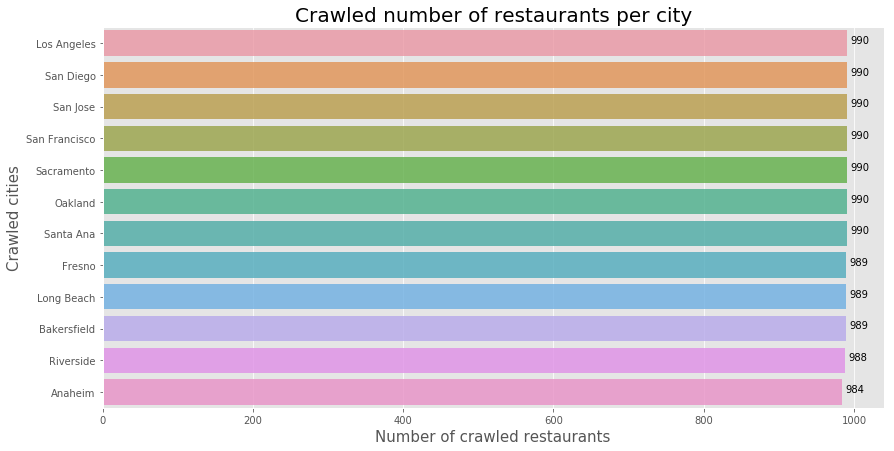

In [19]:
# initial data components plot
# make stats plot of how many restaurants per city were crawled

city_list = cities[:12]
rstats_list = [yelp_df_la.shape[0], yelp_df_sd.shape[0], yelp_df_sj.shape[0], yelp_df_sf.shape[0],
               yelp_df_fr.shape[0], yelp_df_sc.shape[0], yelp_df_lb.shape[0], yelp_df_ok.shape[0],
               yelp_df_bf.shape[0], yelp_df_ah.shape[0], yelp_df_sa.shape[0], yelp_df_rs.shape[0]]
comp_dict = {"Cities": city_list, "Restaurants_number": rstats_list}
comp_df = pd.DataFrame(data=comp_dict).sort_values("Restaurants_number", ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=comp_df.Restaurants_number, y=comp_df.Cities, alpha=0.8)
plt.title("Crawled number of restaurants per city", fontsize=20)
plt.ylabel('Crawled cities', fontsize=15)
plt.xlabel('Number of crawled restaurants', fontsize=15)

# adding the text labels
rects = ax.patches 
labels = comp_df.Restaurants_number.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() + 5, height/2 + rect.get_y(), label, ha='left')
plt.show()

**Observation and comments:**

From the above figure, we saw the components of our whole dataset. Yelp default to give maximum of 990 search results for each city, so that the maximum row of data that we coud collect would be 990 per city. We also missed several records on Fresno, Long Beach, Bakersfield, Riverside, and Anaheim. However, the mixture of the whole yelp dataset would inherit equal-amount of data contributions based on city category, which prevent from potential location bias that could influence the integrity of analysis. 

### Part III: Data concatenation final form 

Here we concatenate all 12 dataframes into a single dataframe: yelp_df_all, and show the shape of the df. 

In [20]:
# Data concatenation
yelp_df_all = pd.concat([yelp_df_la, yelp_df_sd, yelp_df_sj, yelp_df_sf,
                        yelp_df_fr, yelp_df_sc, yelp_df_lb, yelp_df_ok,
                        yelp_df_bf, yelp_df_ah, yelp_df_sa, yelp_df_rs]).reset_index(drop=True)
print(f'Yelp data for all cities: number of rows (restaurants) = {yelp_df_all.shape[0]}')
print(f'number of columns (features) = {yelp_df_all.shape[1]}')
yelp_df_all.sample(3)

Yelp data for all cities: number of rows (restaurants) = 11869
number of columns (features) = 22


Name                                     Address  \
5029  Kiki's Chicken Place         1901 J St,Ste D,Sacramento,CA,95811   
7604               25 Lusk           25 Lusk St,San Francisco,CA,94107   
2594          House of Pho  5353 Almaden Expy,Ste 50,San Jose,CA,95118   

                                               Category   Price Rating  \
5029                                                               3.5   
7604  American (New),Cocktail Bars,Venues & Event Sp...  $31-60    4.0   
2594                                         Vietnamese  $11-30    3.5   

     Reviews                 Mon                 Tue                 Wed  \
5029      76  10:30 am - 9:00 pm  10:30 am - 9:00 pm  10:30 am - 9:00 pm   
7604    1431  11:30 am - 9:30 pm  11:30 am - 9:30 pm  11:30 am - 9:30 pm   
2594     449  10:00 am - 9:00 pm  10:00 am - 9:00 pm  10:00 am - 9:00 pm   

                      Thu  ...                 Sun Delivery Wi_Fi  \
5029   10:30 am - 9:00 pm  ...  11:00 am - 9:00 pm      Yes    No   
7604  11:30 am - 10:00 pm  ...  11:30 am - 8:00 pm       No  Free   
2594   10:00 am - 9:00 pm  ...  10:00 am - 9:00 pm       No    No   

     Takes_Reservations                      Parking Vegetarian_Options  \
5029                 No                  Private Lot               NULL   
7604                Yes  Garage, Street, Private Lot               NULL   
2594                 No                  Private Lot               NULL   

     Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  
5029                  Yes               Yes               NULL      Yes  
7604                  Yes                No                 No       No  
2594                  Yes                No                 No      Yes  

[3 rows x 22 columns]

**Observation and comments:**

In conclusion, this crawled dataset contained **11869** records of restaurants and **22** features as we expected.

### Part IV: Data cleaning and feature engineering

In this part, we perfromed extensive feature engineering and data cleaning procedure.
- 1. We dropped duplicates data based on primary key. For example, there would exist several cases that the restaurants located between the boundary of two cities. 
- 2. Since we had many NaN values from the crawled raw data, we fill all missing values or values filled with str "null" by "Unknown".
- 3. We applied feature engineering on original open hours Mon to Sun, by extraction and formation of 14 new int features (7: MonOpen - SunOpen; 7: MonClose - SunClose).
- 4. We applied feature engineering on Address to extract new feature called "ZIP", which would be used in the later geo-spatial analysis.
- 5. Dropped feature "Parking" as we had four additional features which could replace it
- 6. No need to re-engineer other features. 

**<span style="color:blue">In this part, please refer `Codebase/helper_fe.py` as multiple helper functions.</span>**

In [21]:
# drop duplicates data based on Name as primary key
yelp_df_all = yelp_df_all.drop_duplicates()
yelp_df_all = yelp_df_all.reset_index()

In [22]:
# fill NAN
exceptions(yelp_df_all, verbose=True)
yelp_clean_df = yelp_df_all.applymap(find_null)

No exceptions detected


In [23]:
# feature engineering on open hours 
parking_type=['street', 'lot', 'garage', 'valet']

yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 
               'Sun']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].applymap(get_open_time)
yelp_clean_df[parking_type] = yelp_clean_df.Parking.apply(get_parking)  # create four new features 

yelp_clean_df[['MonOpen', 'TueOpen', 'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 
               'SunOpen']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(grab_start_open)  # 7 new features

yelp_clean_df[['MonClose', 'TueClose', 'WedClose', 'ThuClose', 'FriClose', 'SatClose', 
               'SunClose']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(grab_end_open)  # 7 new features

In [24]:
# get ZIP feature 
yelp_clean_df['ZIP'] = yelp_clean_df.Address.apply(get_ZIP)

In [25]:
# drop feature: `Parking` since we had four additional features which could replace it
yelp_clean_df = yelp_clean_df.drop(['Parking'],axis=1)

In [26]:
# no need to do further feature engineering to `Price` since it only contains 
# four type of responses without "Unknown"
yelp_clean_df.Price.value_counts()

$11-30       6409
Under $10    3399
Unknown      1069
$31-60        439
Above $61      88
Name: Price, dtype: int64

In [27]:
print(yelp_clean_df.shape)
yelp_clean_df.sample(3)

(11404, 41)


index                          Name  \
6549    6549  Golden Corral Buffet & Grill   
10658  11119           Bajio Mexican Grill   
5771    5771     The Old Spaghetti Factory   

                                         Address  \
6549   17308 Bellflower Blvd,Bellflower,CA,90706   
10658             3760 9th St,Riverside,CA,92501   
5771           1625 Watt Ave,Sacramento,CA,95864   

                             Category      Price Rating Reviews  \
6549   Buffets,American (Traditional)     $11-30    3.0     605   
10658                         Mexican  Under $10    4.0      58   
5771                          Italian     $11-30    3.5     162   

                  Mon             Tue             Wed  ... SatOpen SunOpen  \
6549   [[10.0, 21.0]]  [[10.0, 21.0]]  [[10.0, 21.0]]  ...     7.5     7.5   
10658         Unknown         Unknown         Unknown  ...     NaN     NaN   
5771   [[11.5, 21.0]]  [[11.5, 21.0]]  [[11.5, 21.0]]  ...    11.5    11.5   

      MonClose TueClose WedClose ThuClose FriClose SatClose SunClose    ZIP  
6549      21.0     21.0     21.0     21.0     21.5     21.5     21.0  90706  
10658      NaN      NaN      NaN      NaN      NaN      NaN      NaN  92501  
5771      21.0     21.0     21.0     21.0     22.0     22.0     21.0  95864  

[3 rows x 41 columns]

**Observation and comments:**

From the above analysis, the whole dataset was reduced to **9493 rows** and the features were increased to **41**. This clean dataset: yelp_clean_df would used for next section.

## Section IV: Data analysis and visualization

We break this section into six sub sections:
- Part I: Restaurants ratings distribution analysis
- Part II: Restaurants categorical analysis
- Part III: Restaurants operation hours analysis
- Part IV: Restaurants reviews distribution analysis based on cities
- Part V: Restaurants geo-spatial analysis
- Part VI: Other categorical variables analysis

After this above workflow, we expect to gain strong data insights from graphical methods. 

### Part I: Restaurants ratings distribution analysis 

- 1. Overall ratings distributions.
- 2. Individual cities ratings distributions.

**<span style="color:blue">In this part, please refer `Codebase/ratdist_plot.py` as helper plotting class.</span>**

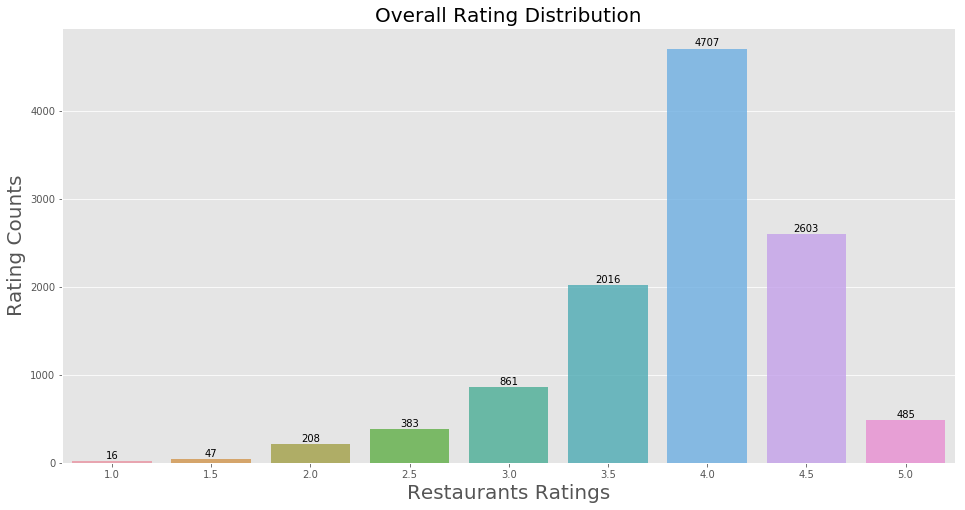

In [27]:
# Overall Rating Distribution
plt.figure(figsize=(16, 8))
ratdist = RatdistPlot(yelp_clean_df)
ratdist.plot(yelp_clean_df, 20, "Overall Rating Distribution")

**Observation and comments:**

From the above plot:
- 1.The overall restaurants ratings distribution was **left skewed**, which means majority of restaurants have ratings between 3.0 to 5.0. 

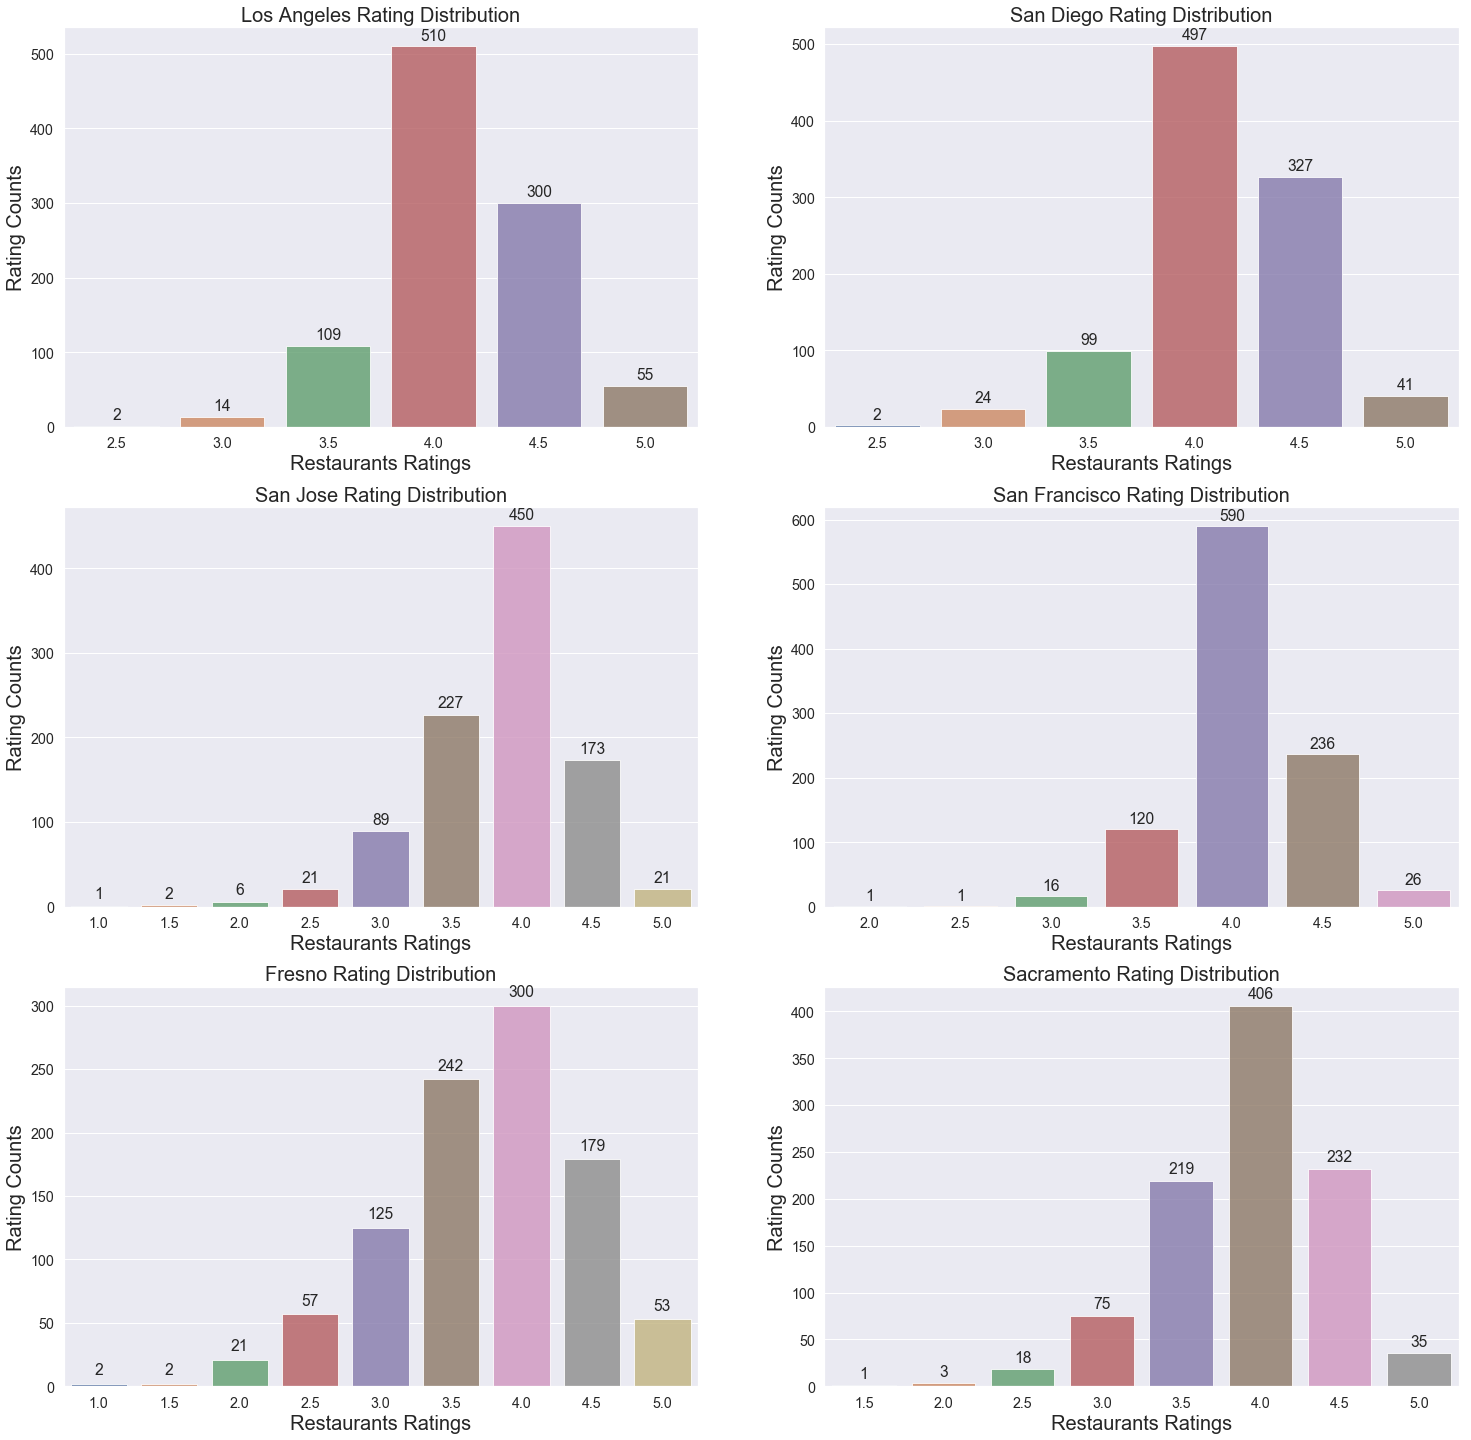

In [28]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.3)
# Los Angeles
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_la)
clean_yelp_df_la = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_la, 20, "Los Angeles Rating Distribution")

# San Diego
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_sd)
clean_yelp_df_sd = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_sd, 20, "San Diego Rating Distribution")

# San Jose
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_sj)
clean_yelp_df_sj = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_sj, 20, "San Jose Rating Distribution")

# San Francisco
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_sf)
clean_yelp_df_sf = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_sf, 20, "San Francisco Rating Distribution")

# Fresno
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_fr)
clean_yelp_df_fr = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_fr, 20, "Fresno Rating Distribution")

# Sacramento
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_sc)
clean_yelp_df_sc = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_sc, 20, "Sacramento Rating Distribution")

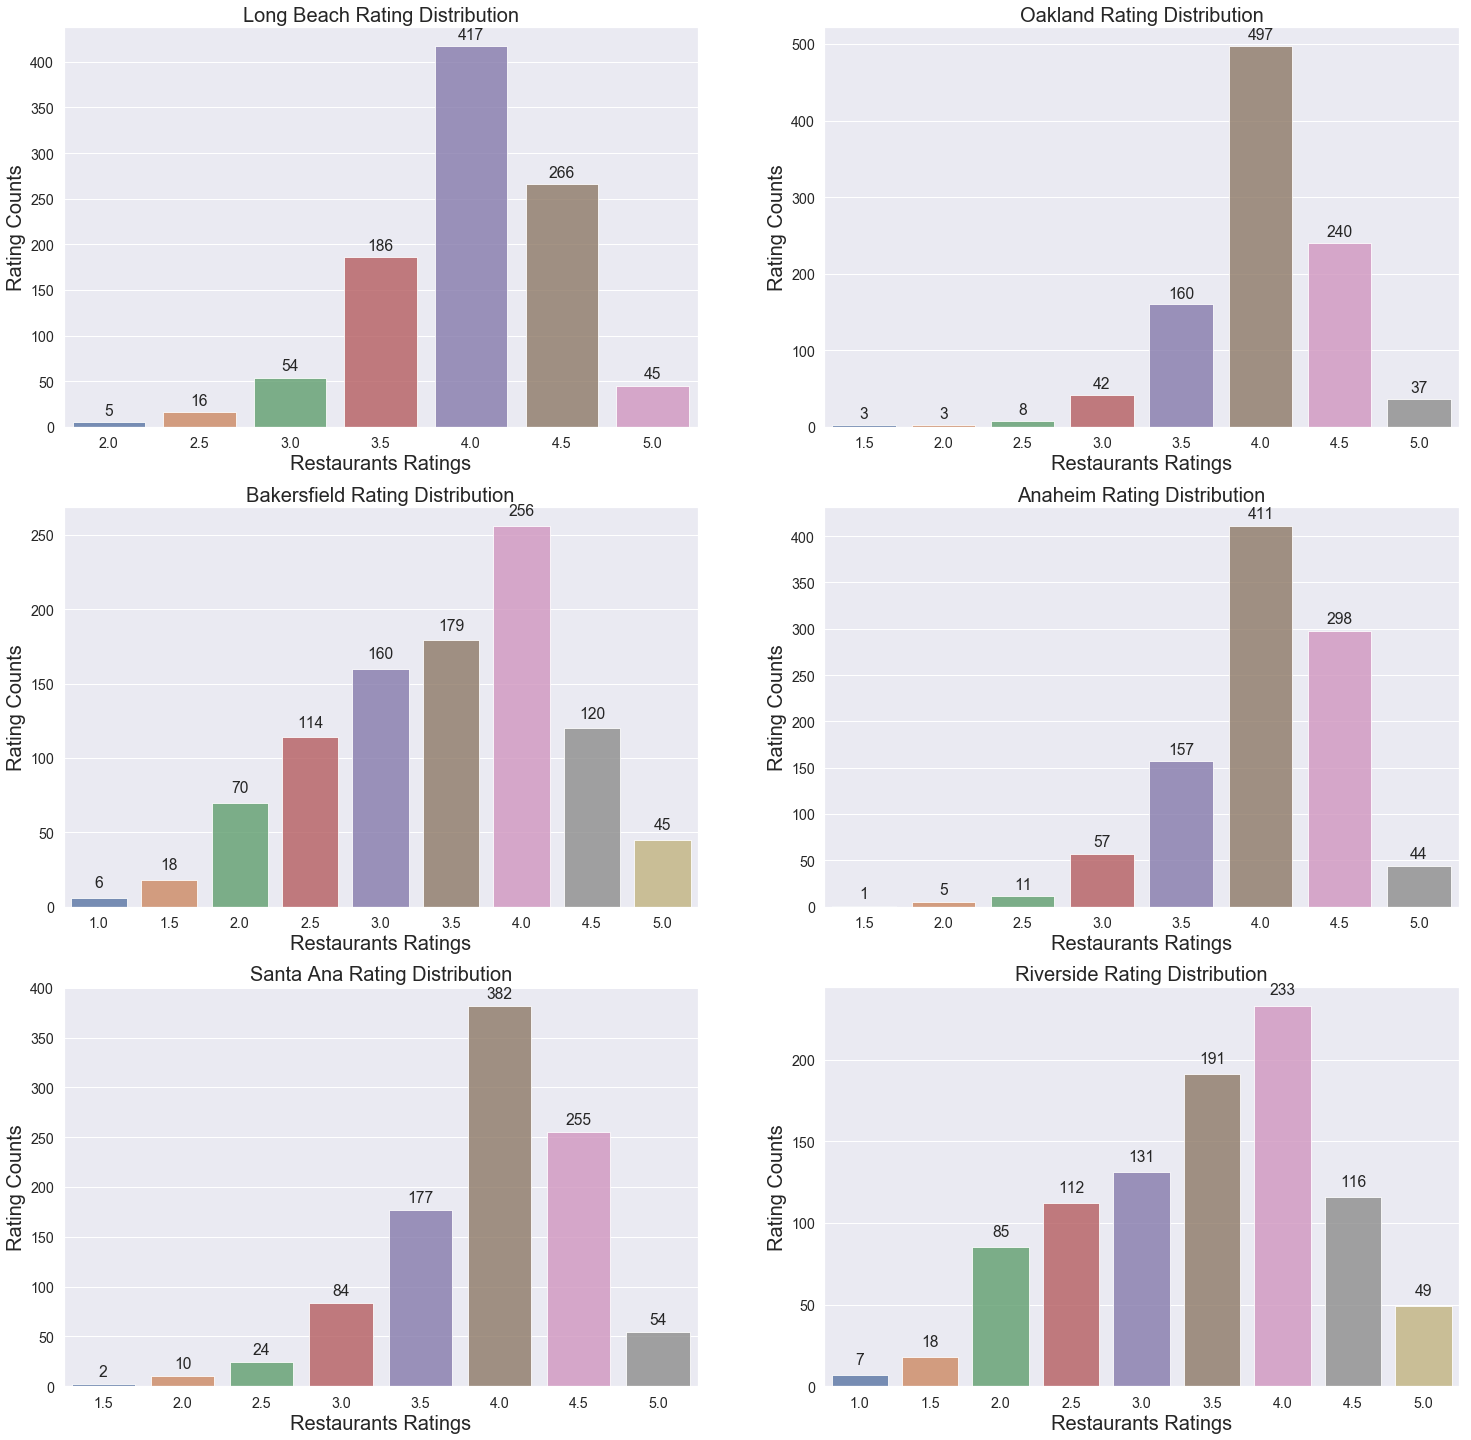

In [29]:
# Long Beach
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_lb)
clean_yelp_df_lb = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_lb, 20, "Long Beach Rating Distribution")

# Oakland
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_ok)
clean_yelp_df_ok = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_ok, 20, "Oakland Rating Distribution")

# Bakersfield
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_bf)
clean_yelp_df_bf = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_bf, 20, "Bakersfield Rating Distribution")

# Anaheim
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_ah)
clean_yelp_df_ah = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_ah, 20, "Anaheim Rating Distribution")

# Santa Ana
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_sa)
clean_yelp_df_sa = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_sa, 20, "Santa Ana Rating Distribution")

# Riverside
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_rs)
clean_yelp_df_rs = ratdist.clean_each_city_df()
ratdist.plot(clean_yelp_df_rs, 20, "Riverside Rating Distribution")

**Observation and comments:**

From the above plot:
- 1. Generally, Los Angeles, San Diego, San Francisco, Oakland have lowest portion of restaurants with rating below 4.0.
- 2. Fresno, Bakersfield, and Riverside have more frequency of low ratings restaurants compared with other cities. 
- 3. Majority of ratings are 3.5 to 4.5, we saw the geneous of Yelp reviewers on these restaurants.
- 4. Bakersfield and Riverside had relatively uniform rating distributions.

### Part II: Restaurants categorical analysis 

**<span style="color:blue">In this part, please refer `Codebase/category_plot.py` as helper plotting class.</span>**

There are 297 different word categories to describe restaurants in Yelp


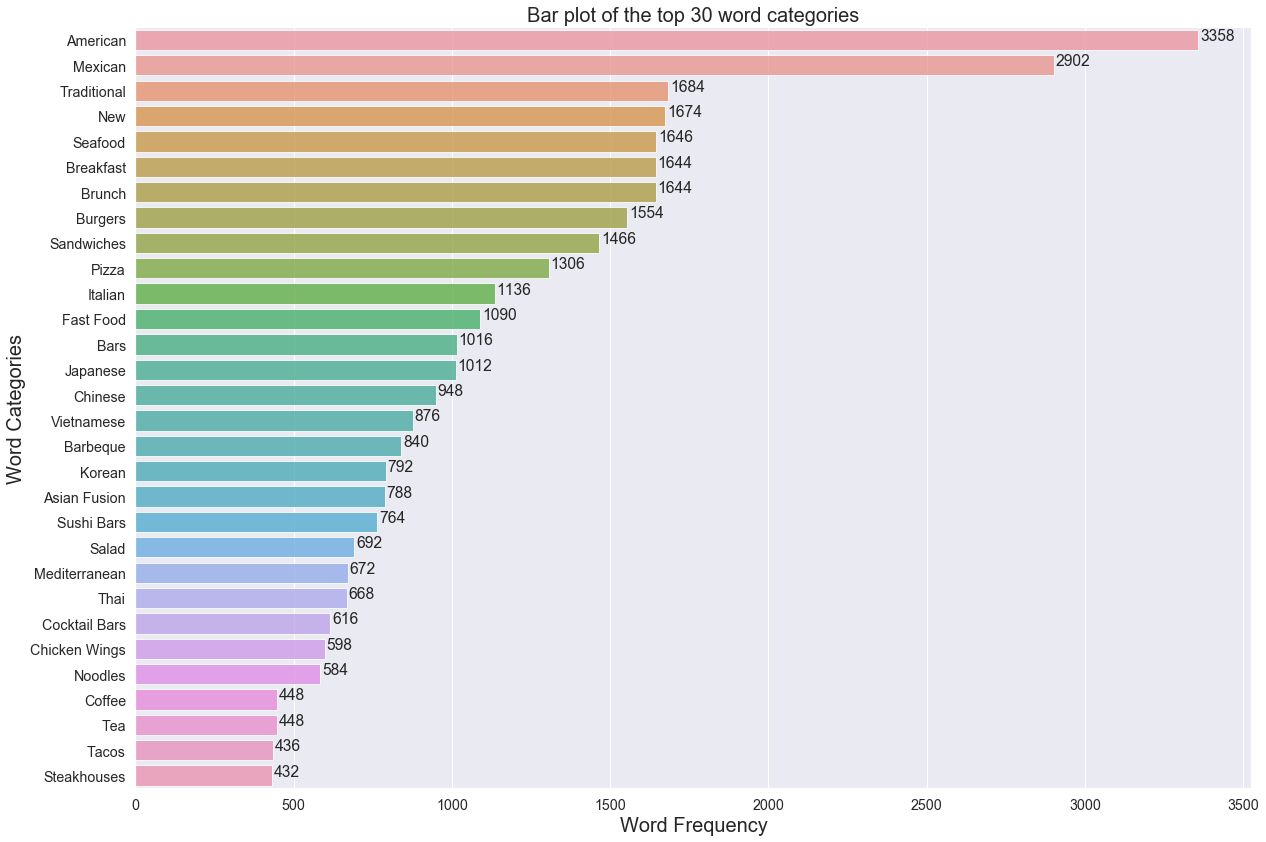

In [39]:
# apply to all dataset 
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.3)
category_plot = CategoryPlot(yelp_clean_df)
category_plot.category_counting()
category_plot.cat_plot(30, 20, "Bar plot of the top 30 word categories", overall=True, verbose=True)

**Observation and comments:**

From the above plot:
- We conclude that "traditional American food" dominated the key words / category distributions.
- We also observe tremendous "Asian elements" in this board, such as "Chinese", "Vietnamese", "japanese", Korean", Asian fusion", and "Thai".
- We didn't observe too many European eleements from this board.

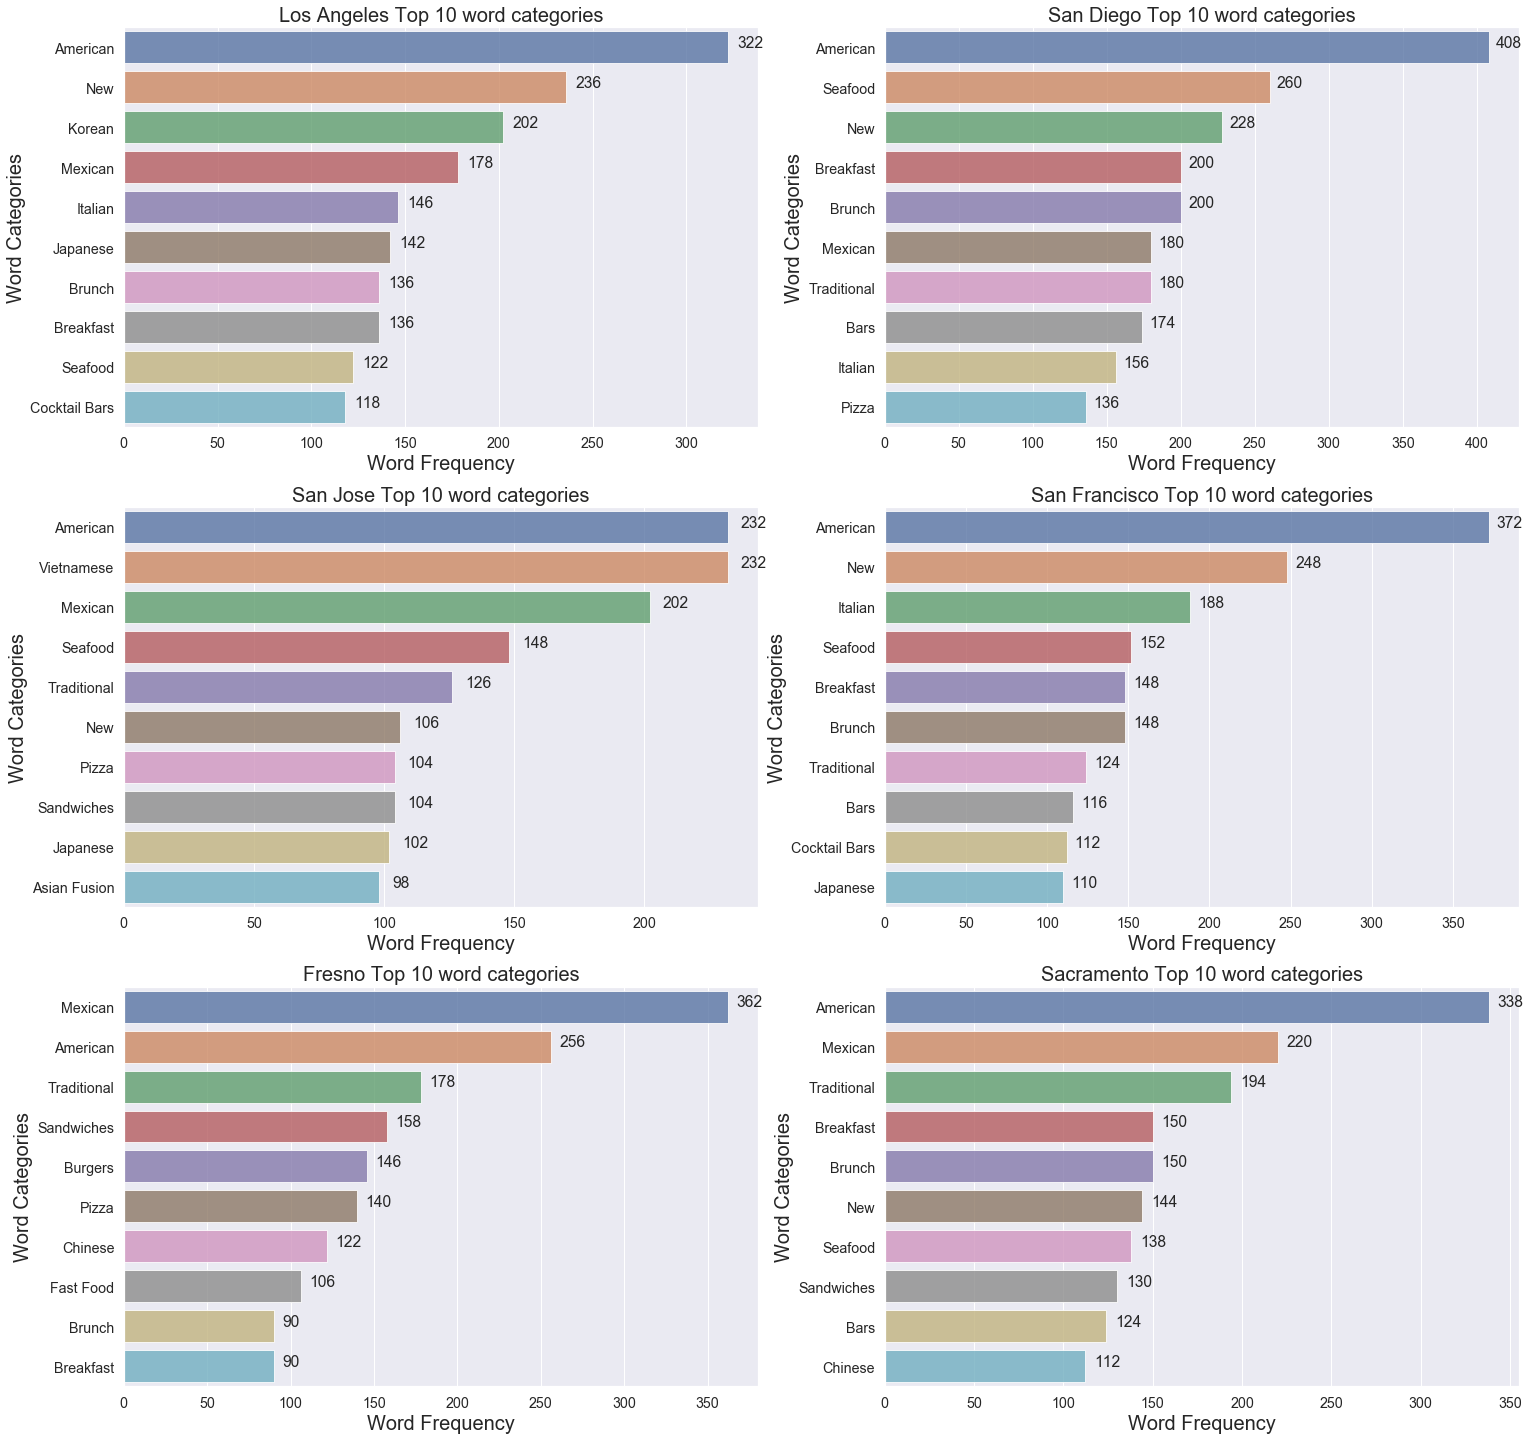

In [31]:
# 12 top 10 words plots
sns.set(font_scale=1.3)

# Los Angeles
plt.subplot(321)
category_plot = CategoryPlot(clean_yelp_df_la)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Los Angeles Top 10 word categories")

# San Diego
plt.subplot(322)
category_plot = CategoryPlot(clean_yelp_df_sd)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Diego Top 10 word categories")

# San Jose
plt.subplot(323)
category_plot = CategoryPlot(clean_yelp_df_sj)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Jose Top 10 word categories")

# San Francisco
plt.subplot(324)
category_plot = CategoryPlot(clean_yelp_df_sf)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Francisco Top 10 word categories")

# Fresno
plt.subplot(325)
category_plot = CategoryPlot(clean_yelp_df_fr)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Fresno Top 10 word categories")

# Sacramento
plt.subplot(326)
category_plot = CategoryPlot(clean_yelp_df_sc)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Sacramento Top 10 word categories")

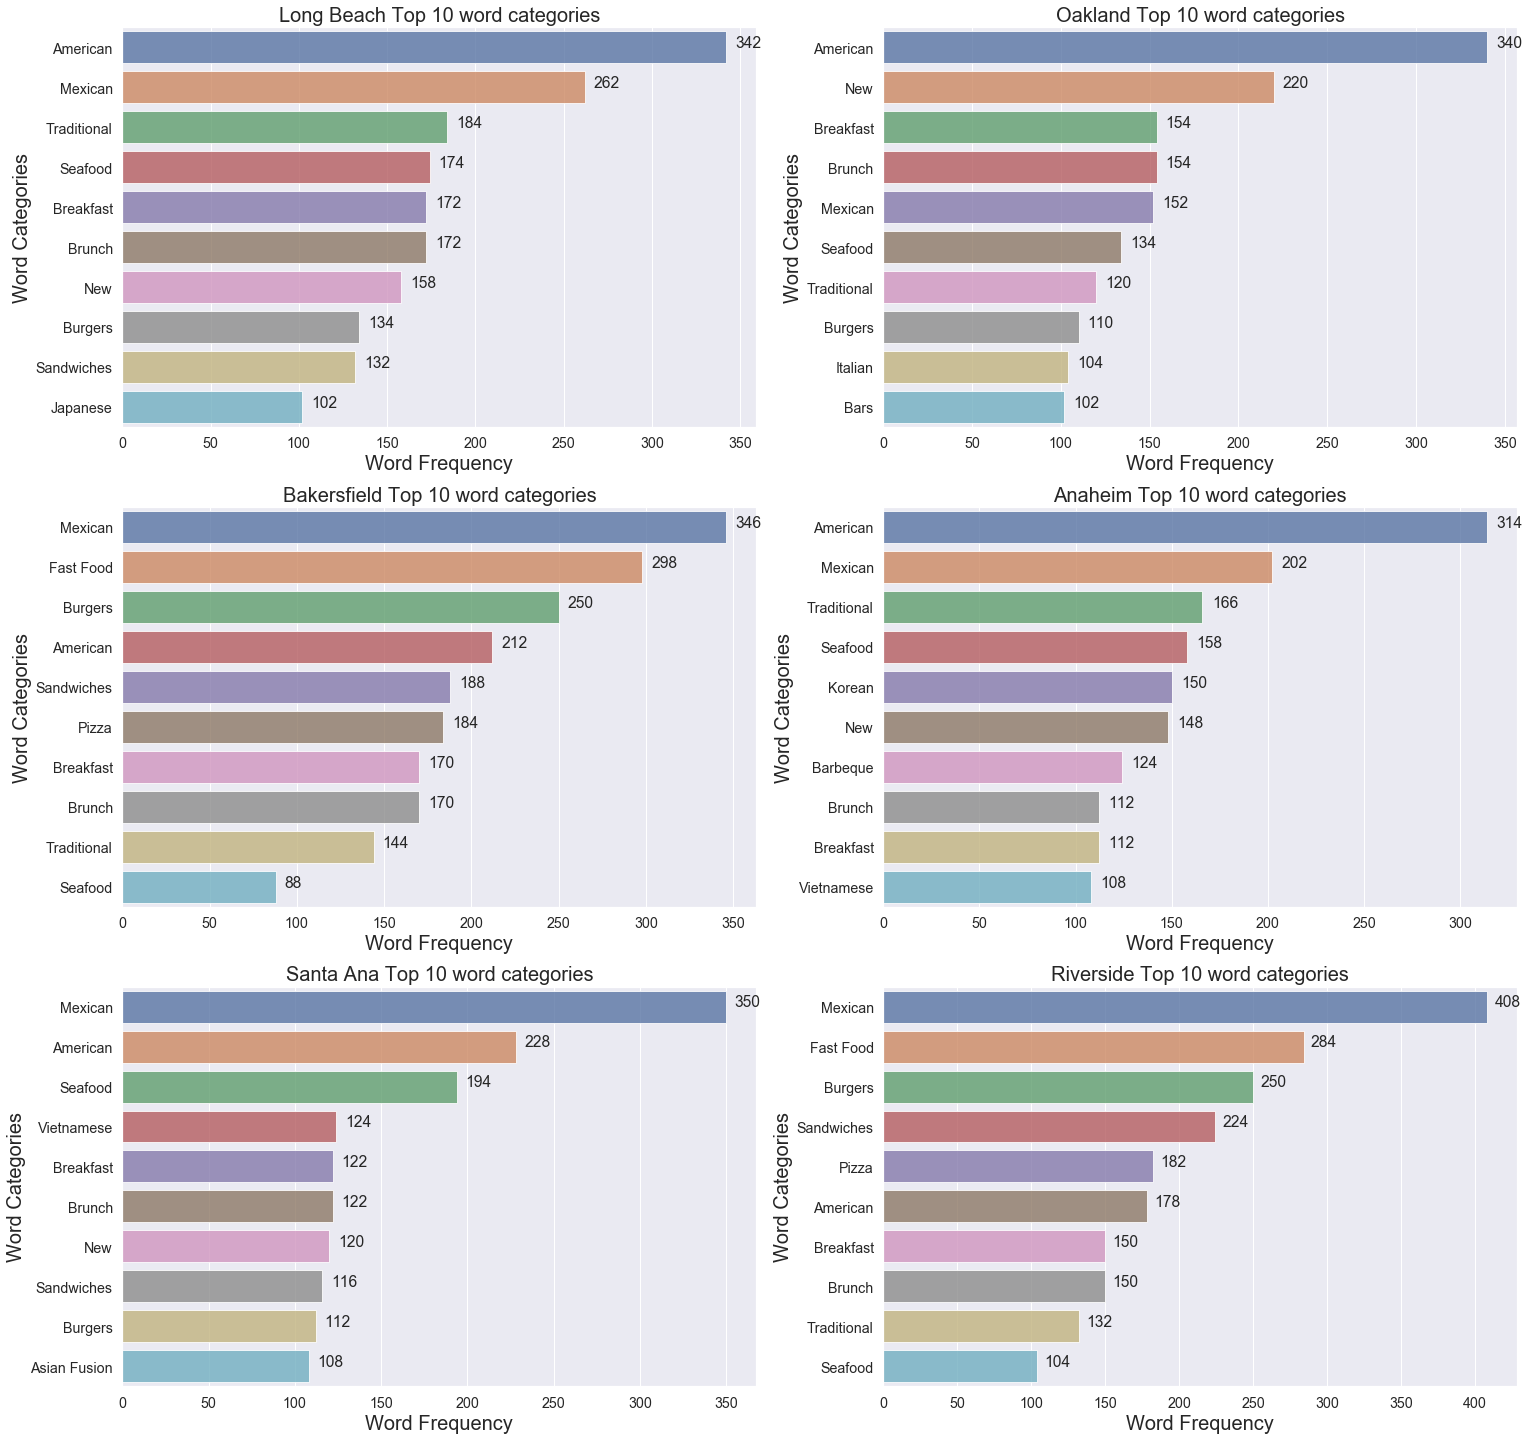

In [32]:
# Long Beach
plt.subplot(321)
category_plot = CategoryPlot(clean_yelp_df_lb)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Long Beach Top 10 word categories")

# Oakland
plt.subplot(322)
category_plot = CategoryPlot(clean_yelp_df_ok)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Oakland Top 10 word categories")

# Bakersfield
plt.subplot(323)
category_plot = CategoryPlot(clean_yelp_df_bf)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Bakersfield Top 10 word categories")

# Anaheim
plt.subplot(324)
category_plot = CategoryPlot(clean_yelp_df_ah)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Anaheim Top 10 word categories")

# Santa Ana
plt.subplot(325)
category_plot = CategoryPlot(clean_yelp_df_sa)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Santa Ana Top 10 word categories")

# Riverside
plt.subplot(326)
category_plot = CategoryPlot(clean_yelp_df_rs)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Riverside Top 10 word categories")

**Observation and comments:**

From the above plot:
- 1. It's observed that in South California, "Mexican" element could even surpass the "American" element, and this could be explained by geo-graphical reasons. 
- 2. San Diego, famous for its sea views, we saw sea food ranked as second place, and this pattern could also be observed in other cities near Parcific Ocean, e.g. San Francisco.
- 3. We also observed that San Jose has most average key words frequency, their top three categories: American, Mexican, and Vietnamese compoents were approximately the same.

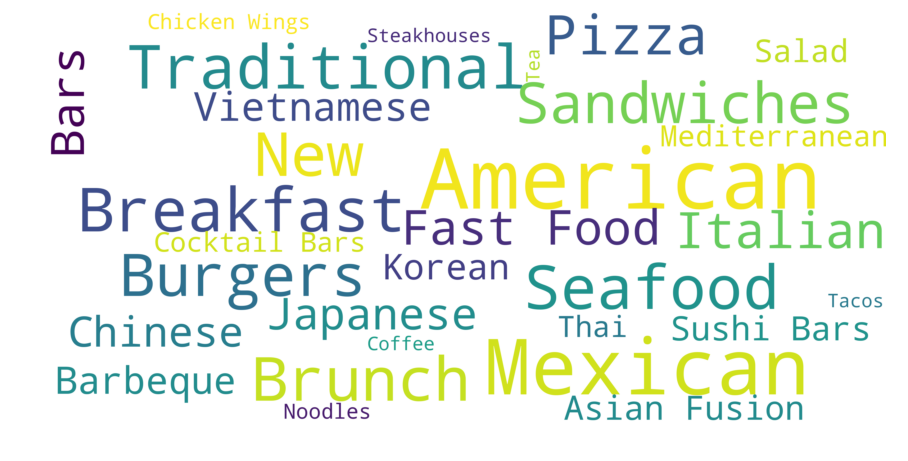

In [40]:
# word cloud plot on cancat dataset
category_plot = CategoryPlot(yelp_clean_df)
category_plot.category_counting()
cats_txt_list = yelp_clean_df['Category'].to_string()  # extract text
category_plot.make_word_cloud(cats_txt_list)

**Observations and explanation:**

From the plot above:
- This word cloud showed the majority caterogires on the board. The conclusion is the same as the previous Bar plot. we used a different graphical aesthtics to describe this observation.

### Part III: Restaurants operation hours analysis

**<span style="color:blue">In this part, please refer `Codebase/ophrs_plot.py` as helper plotting class.</span>**

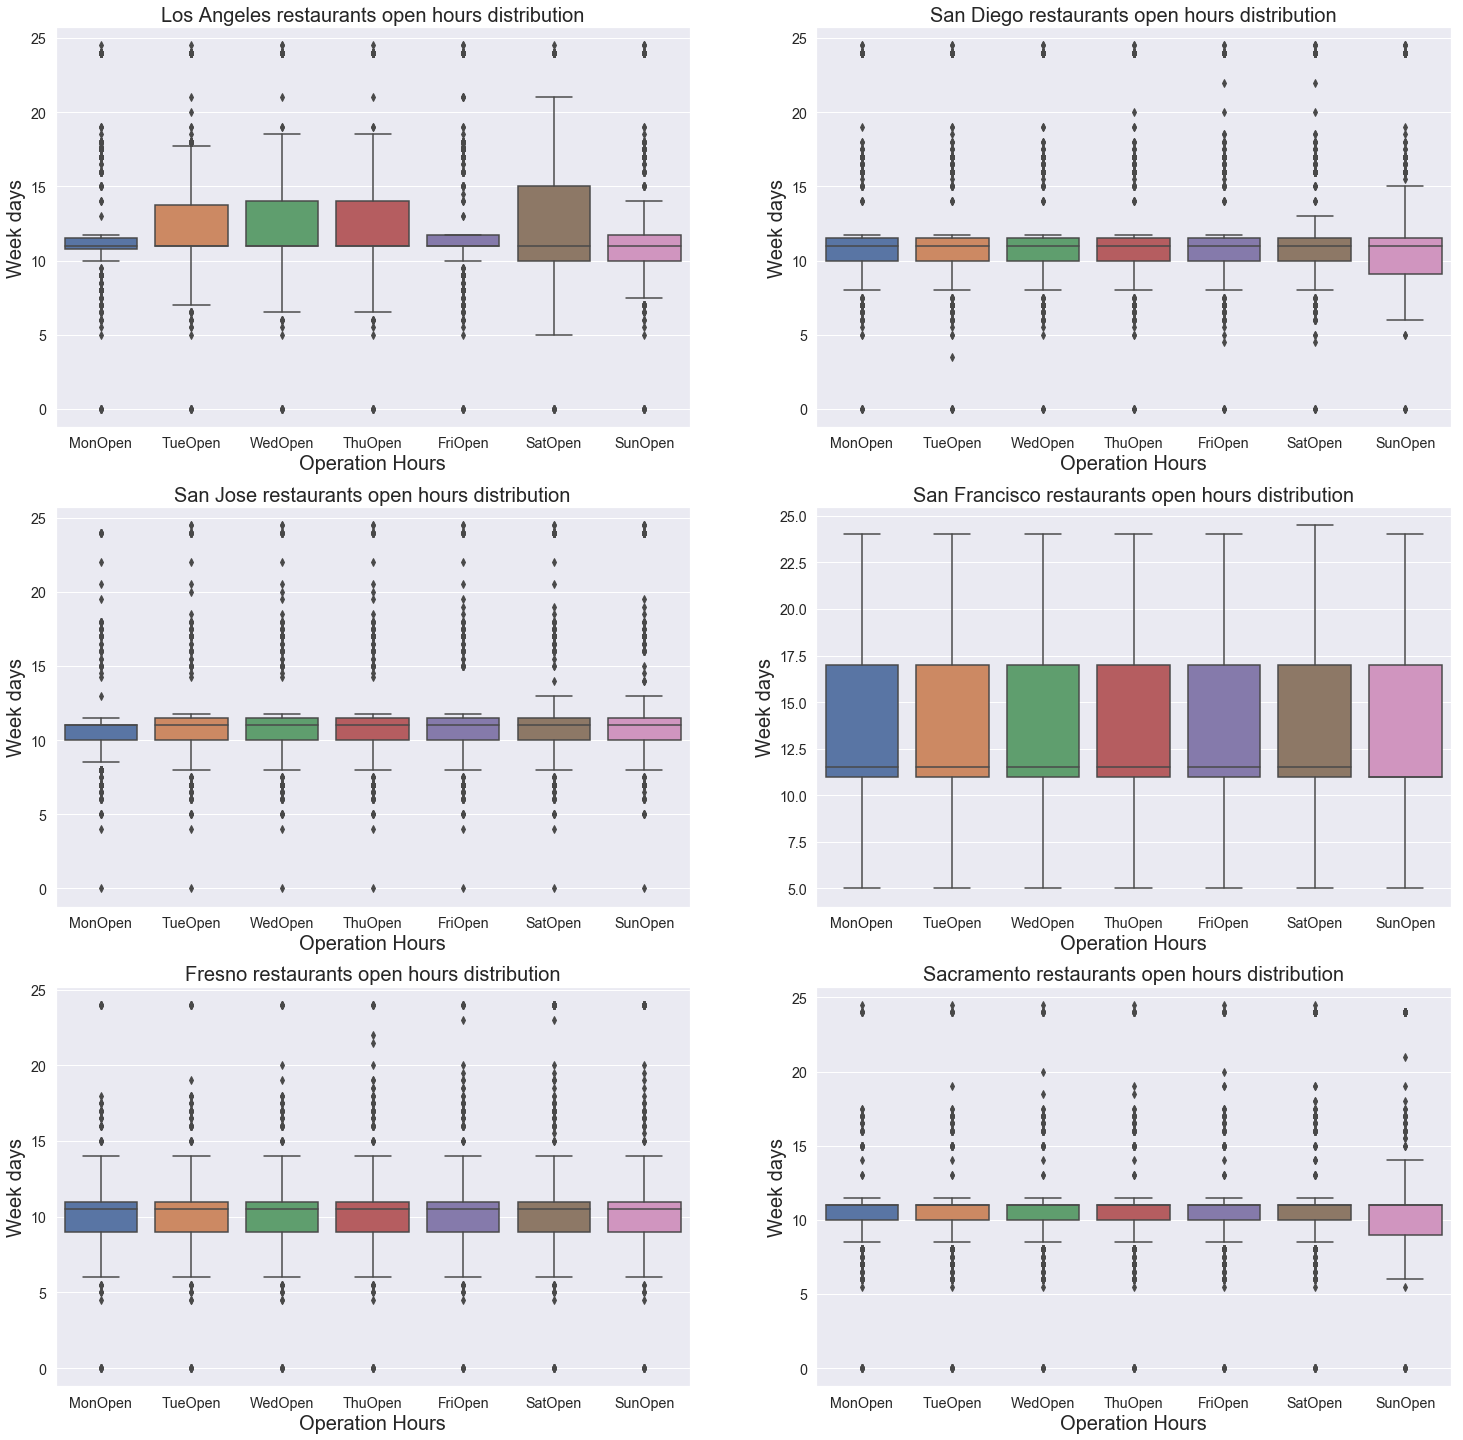

In [34]:
# 12 cities' restaurants open hours boxplots
sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=1.3)

# Los Angeles
plt.subplot(321)
ophrs_plot = OpHrsPlot(clean_yelp_df_la)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Los Angeles restaurants open hours distribution")

# San Diego
plt.subplot(322)
ophrs_plot = OpHrsPlot(clean_yelp_df_sd)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "San Diego restaurants open hours distribution")

# San Jose
plt.subplot(323)
ophrs_plot = OpHrsPlot(clean_yelp_df_sj)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "San Jose restaurants open hours distribution")

# San Francisco
plt.subplot(324)
ophrs_plot = OpHrsPlot(clean_yelp_df_sf)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "San Francisco restaurants open hours distribution")

# Fresno
plt.subplot(325)
ophrs_plot = OpHrsPlot(clean_yelp_df_fr)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Fresno restaurants open hours distribution")

# Sacramento
plt.subplot(326)
ophrs_plot = OpHrsPlot(clean_yelp_df_sc)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Sacramento restaurants open hours distribution")

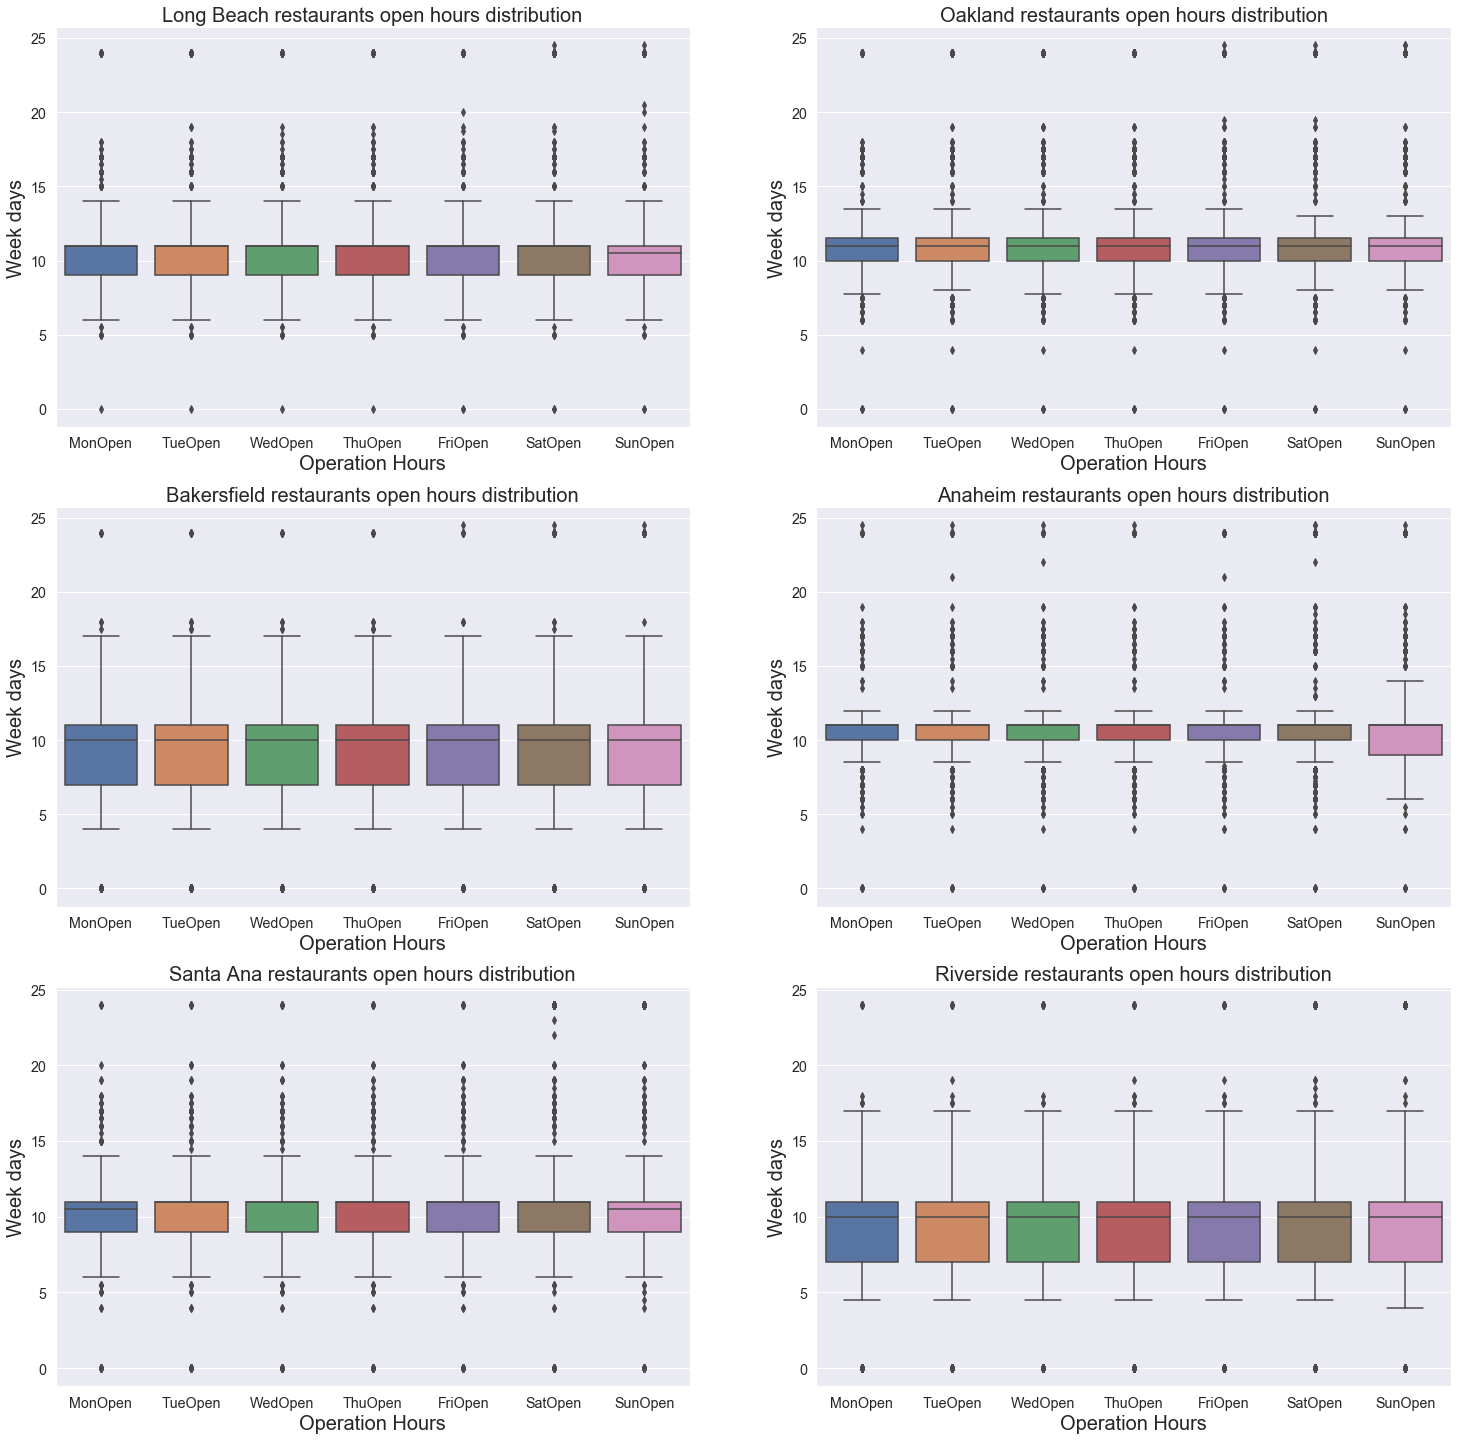

In [35]:
# Long Beach
plt.subplot(321)
ophrs_plot = OpHrsPlot(clean_yelp_df_lb)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Long Beach restaurants open hours distribution")

# Oakland
plt.subplot(322)
ophrs_plot = OpHrsPlot(clean_yelp_df_ok)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Oakland restaurants open hours distribution")

# Bakersfield
plt.subplot(323)
ophrs_plot = OpHrsPlot(clean_yelp_df_bf)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Bakersfield restaurants open hours distribution")

# Anaheim
plt.subplot(324)
ophrs_plot = OpHrsPlot(clean_yelp_df_ah)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Anaheim restaurants open hours distribution")

# Santa Ana
plt.subplot(325)
ophrs_plot = OpHrsPlot(clean_yelp_df_sa)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Santa Ana restaurants open hours distribution")

# Riverside
plt.subplot(326)
ophrs_plot = OpHrsPlot(clean_yelp_df_rs)
ophrs_plot.add_hours_feature()
ophrs_plot.box_plot(20, "Riverside restaurants open hours distribution")

**Observations and explanation:**

From the plot above:
- 1. It's observed that for San Jose, and San Francisco, there is no much difference in open hour among the whole week. However, restaurants in San Francisco tend to show flxibale open hour distributions, while restaurants in San Jose show more diverse open hour. 
- 2. For Los Angeles, we saw open hour on Tue, Wed, and Thr were approximately the same, while open hour for Mon and Fri were similar to each other. Open hour for Sat was flexible, and for Sun tend to be relative earlier. 

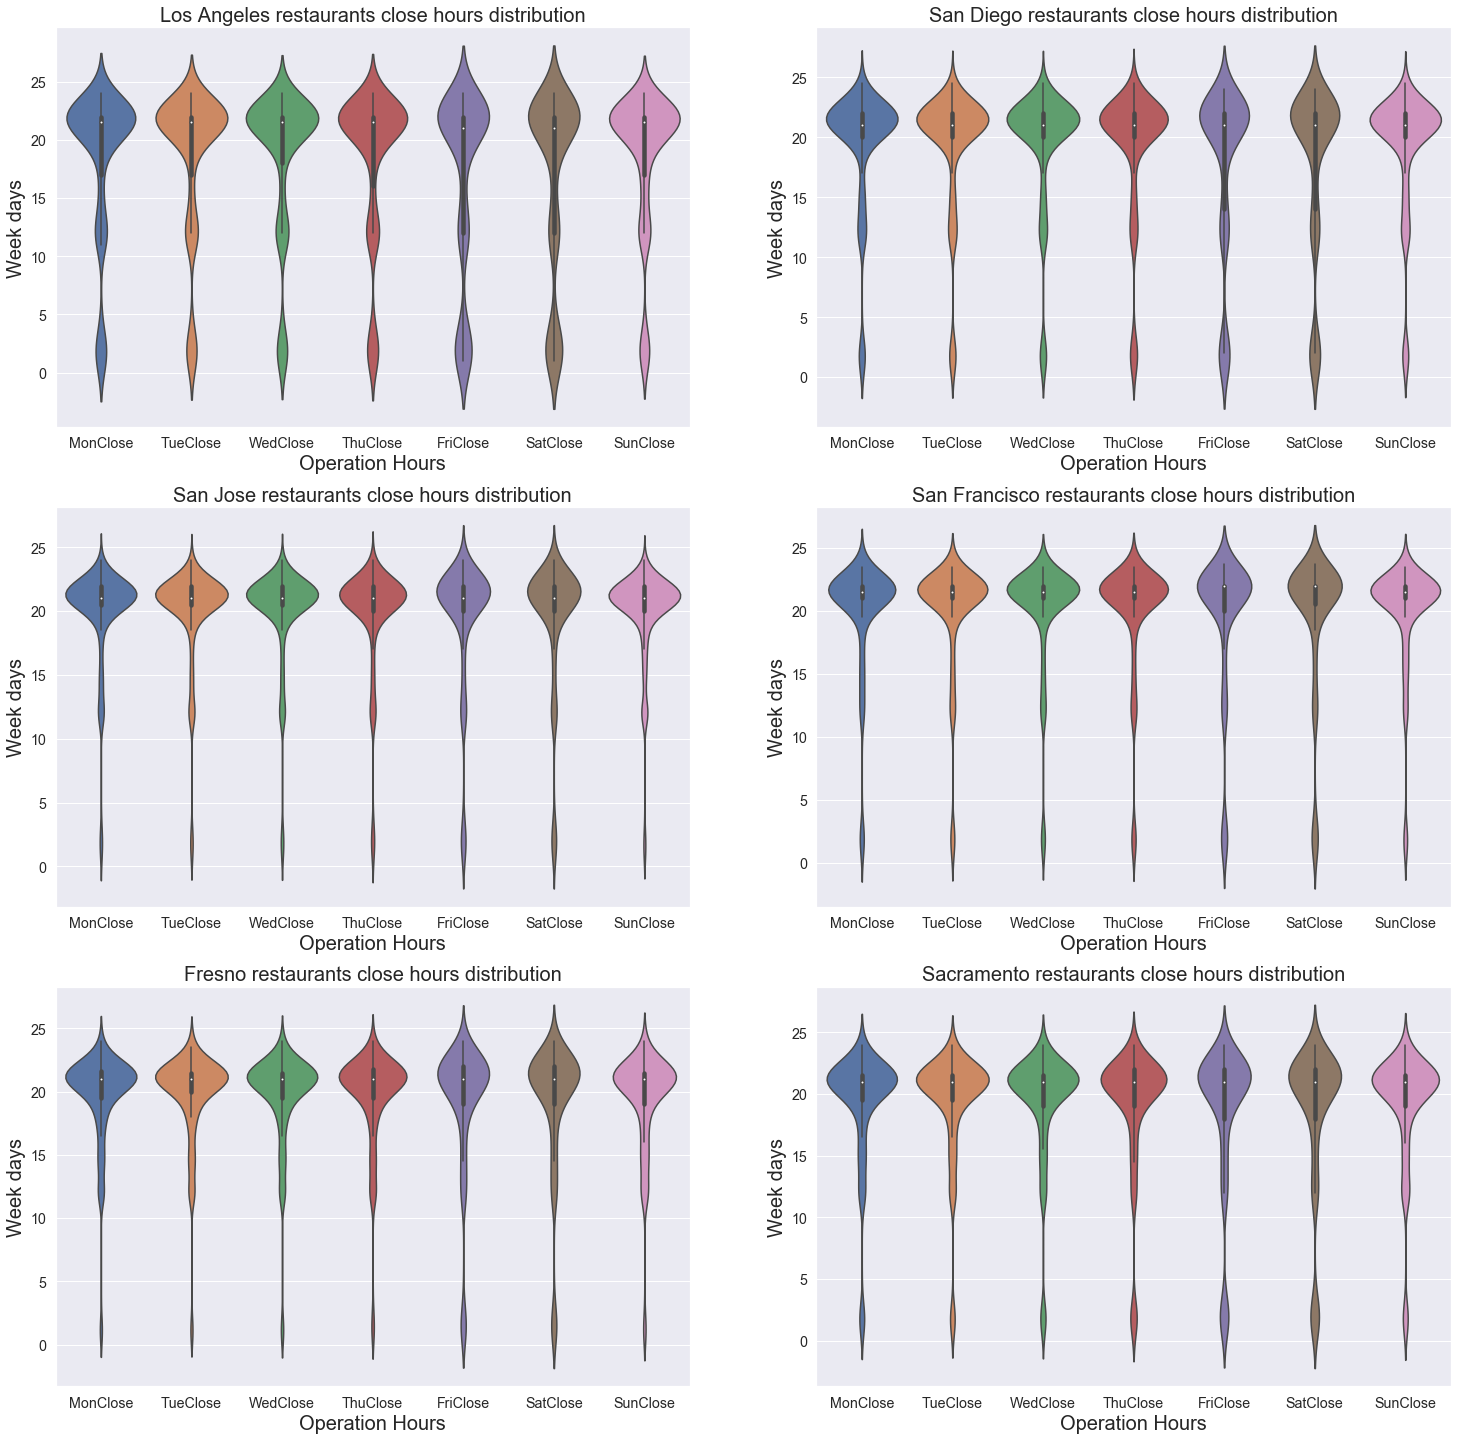

In [36]:
# 12 cities' restaurants open hours violin plots

# Los Angeles
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_la)  # reset each city yelp dataframe 
clean_yelp_df_la = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_la)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Los Angeles restaurants close hours distribution")

# San Diego
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_sd)
clean_yelp_df_sd = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_sd)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "San Diego restaurants close hours distribution")

# San Jose
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_sj)
clean_yelp_df_sj = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_sj)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "San Jose restaurants close hours distribution")

# San Francisco
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_sf)
clean_yelp_df_sf = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_sf)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "San Francisco restaurants close hours distribution")

# Fresno
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_fr)
clean_yelp_df_fr = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_fr)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Fresno restaurants close hours distribution")

# Sacramento
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_sc)
clean_yelp_df_sc = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_sc)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Sacramento restaurants close hours distribution")

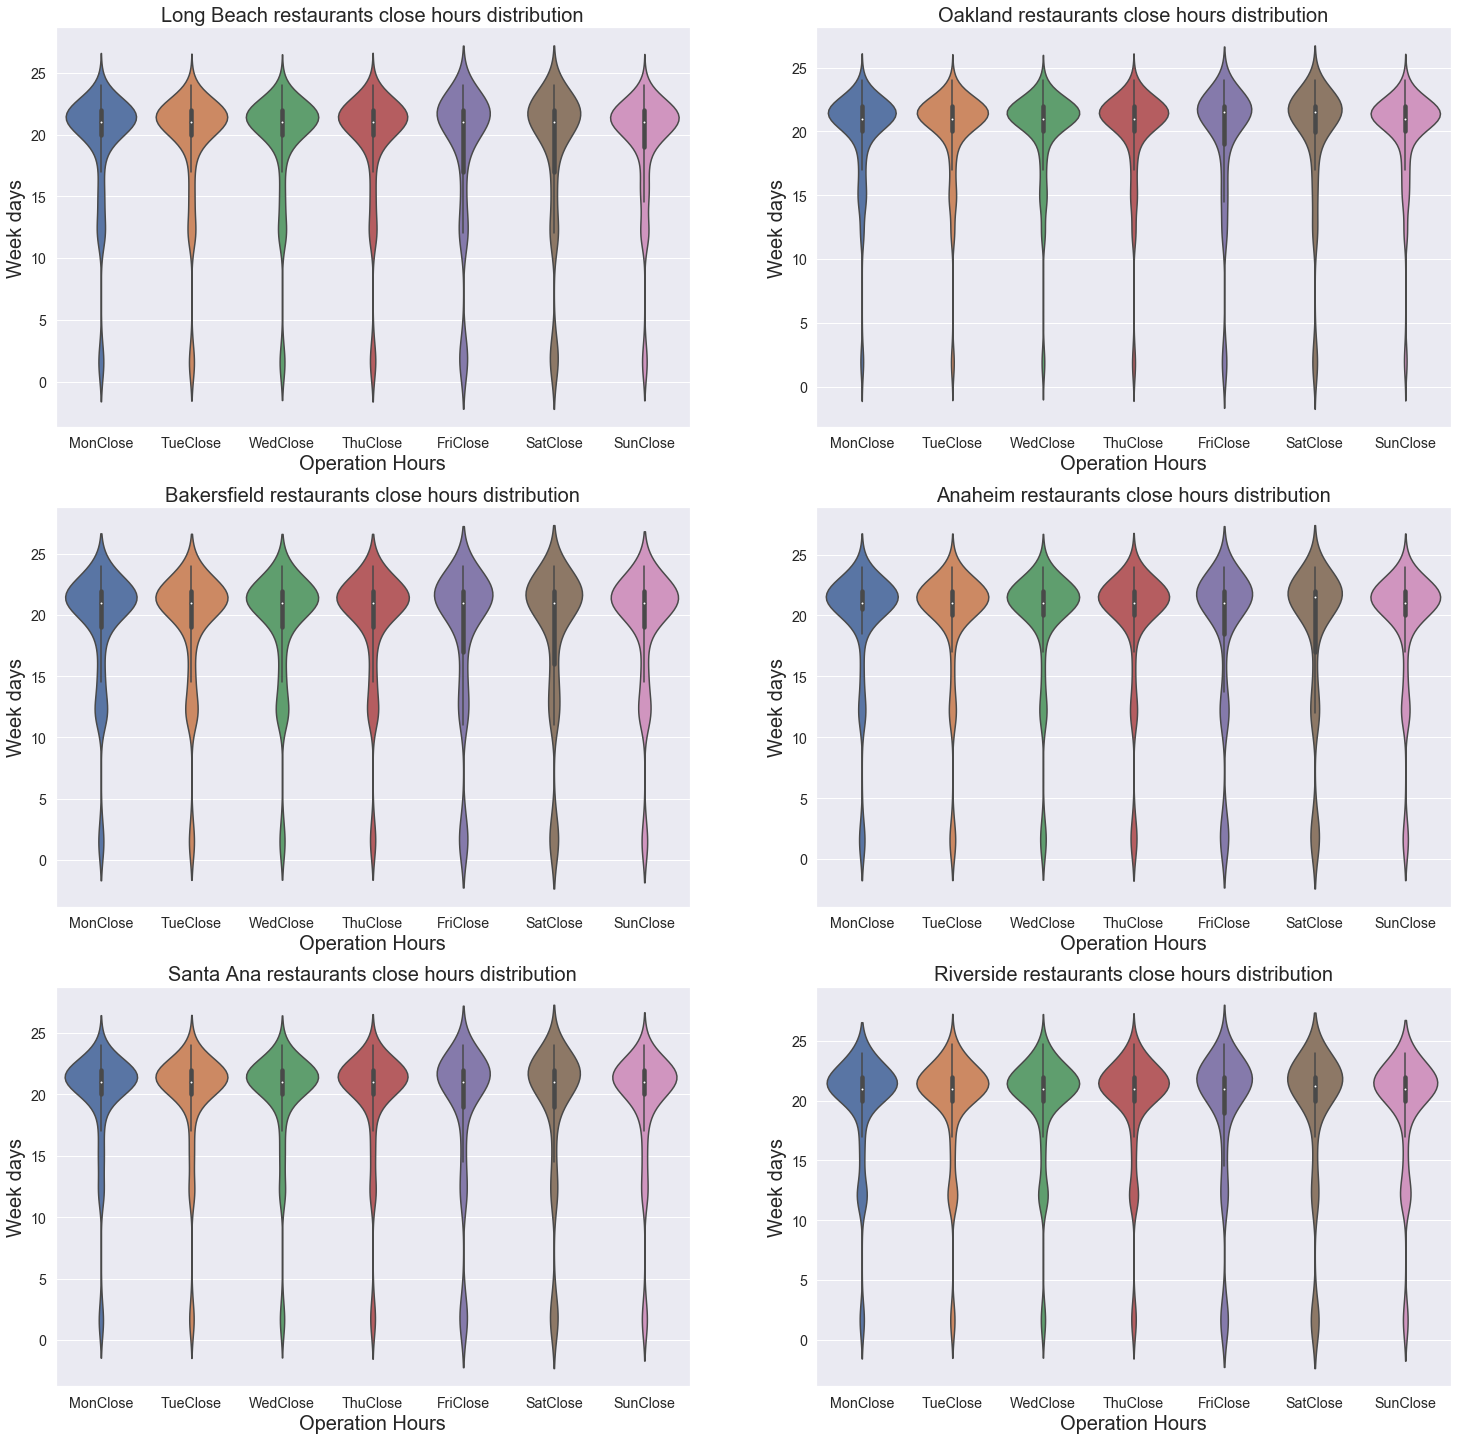

In [37]:
# Long Beach
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_lb)  # reset each city yelp dataframe 
clean_yelp_df_lb = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_lb)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Long Beach restaurants close hours distribution")

# Oakland
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_ok)
clean_yelp_df_ok = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_ok)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Oakland restaurants close hours distribution")

# Bakersfield
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_bf)
clean_yelp_df_bf = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_bf)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Bakersfield restaurants close hours distribution")

# Anaheim
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_ah)
clean_yelp_df_ah = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_ah)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Anaheim restaurants close hours distribution")

# Santa Ana
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_sa)
clean_yelp_df_sa = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_sa)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Santa Ana restaurants close hours distribution")

# Riverside
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_rs)
clean_yelp_df_rs = ratdist.clean_each_city_df()
ophrs_plot = OpHrsPlot(clean_yelp_df_rs)
ophrs_plot.add_hours_feature()
ophrs_plot.violin_plot(20, "Riverside restaurants close hours distribution")

**Observations and explanation:**

From the plot above:
- 1. We saw all restaurants in all cities showed simialr close hour behavior. 

### Part IV: Top 25 restaurants reviews distribution analysis based on cities 

We performed extensive analysis on Top 25 restaurants reviews.
- 1. Show top number of reviews by Archimedean spiral-liked plot.
- 2. Open-hour (i.e. start time) of the Top 25 restaurants
- 3. Relationships between price levels and ratings of the Top 25 restaurants.

In [38]:
reviews_df = yelp_clean_df[yelp_clean_df['Reviews'] != "Unknown"]
reviews_df['Reviews'] = reviews_df['Reviews'].apply(int)

In [39]:
# sort the df by reviews frequency 
reviews_df = reviews_df.sort_values('Reviews', ascending=False)

# extract data 
v = reviews_df['Name'].values.tolist()[0:25]
d = reviews_df['Reviews'].values.tolist()[0:25]

# set up colors
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#7D3990',
                '#A63F98','#C31C88','#D52178','#D5225B','#D02C2A',
                '#D44C2D','#F57A34','#FA8F2F','#D99D21','#CF7B25']

In [40]:
# pie plot instance 
pie1 = Pie(init_opts=opts.InitOpts(width='1000px', height='500px'))

# set colors
pie1.set_colors(color_series)

# import data 
pie1.add("", [list(z) for z in zip(v, d)],
        radius=["30%", "135%"],
        center=["50%", "65%"],
        rosetype="area")

# figure configurations
pie1.set_global_opts(title_opts=opts.TitleOpts(title='Top 25 most popular restaurants with most reviews'),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())

pie1.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,
                                               formatter="{b}:{c}", font_style="italic",
                                               font_weight="bold"))
pie1.render_notebook()

**Note: If you can't view the User-Interface (UI) image above (which happened several times during our own tests), please refer to the figure below, we saved this image as .png file:**
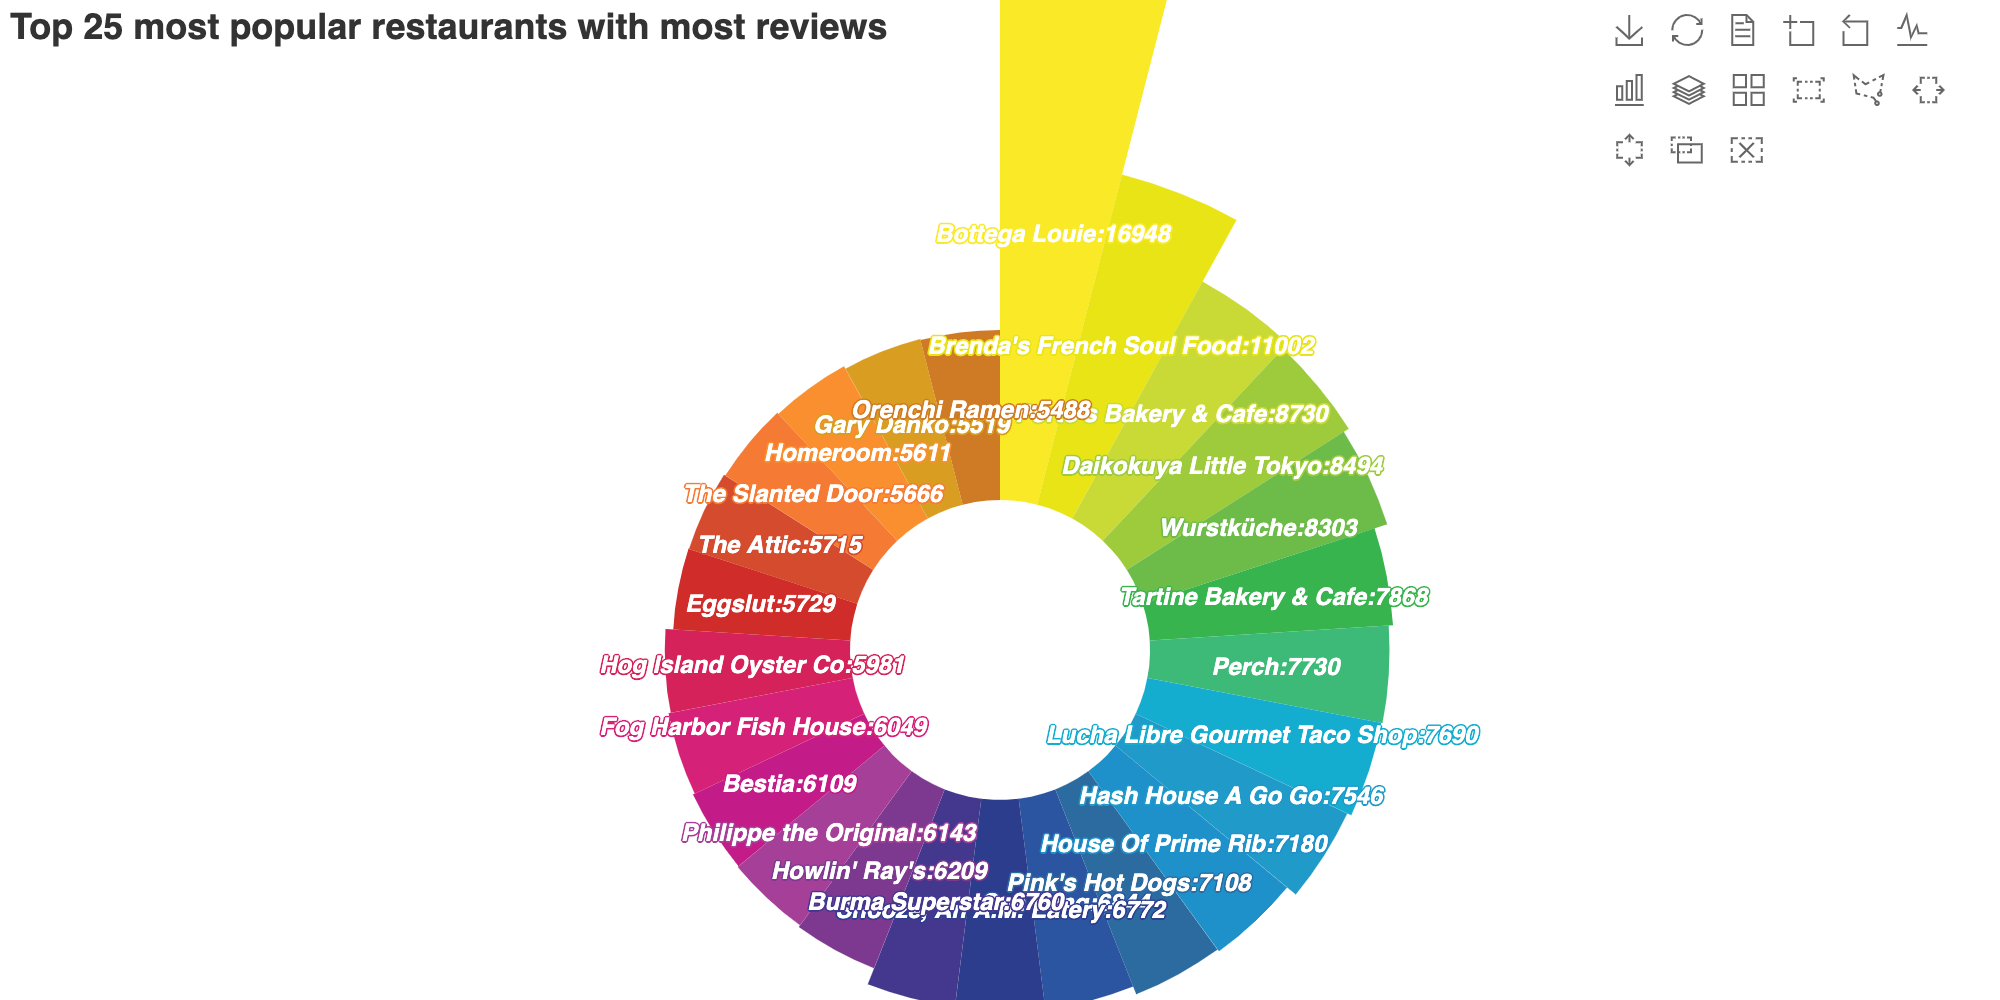

**Observations and Comments:**

- The plot above showed top 25 most reviewed restaurants by this Archimedean spiral-liked plot.

We would like perfrom some further analysis combined graphical methods on these top 25 restaurants, and we before with a list of these ideal restaurants:

In [41]:
# store the top 25 restaurants into a list
ideal_rets = ['Bottega Louie',
 "Brenda's French Soul Food",
 "Porto's Bakery & Cafe",
 'Daikokuya Little Tokyo',
 'Wurstküche',
 'Tartine Bakery & Cafe',
 'Perch',
 'Lucha Libre Gourmet Taco Shop',
 'Hash House A Go Go',
 'House Of Prime Rib',
 "Pink's Hot Dogs",
 'San Tung',
 'Snooze, An A.M. Eatery',
 'Burma Superstar',
 "Howlin' Ray's",
 'Philippe the Original',
 'Bestia',
 'Fog Harbor Fish House',
 'Hog Island Oyster Co',
 'Eggslut',
 'The Attic',
 'The Slanted Door',
 'Homeroom',
 'Gary Danko',
 'Orenchi Ramen']

In [42]:
def ideal_rests_filter(item, ideal_rets=ideal_rets):
    """ find sub dataframe of the top 25 restaurants
    Param:
        item: one item in dataframe
    Return:
        bool value based on if the item is in the ideal_rets list 
    """
    if item.strip() in ideal_rets:
        return True
    else:
        return False

Text(0.5, 0, 'A Whole Week')

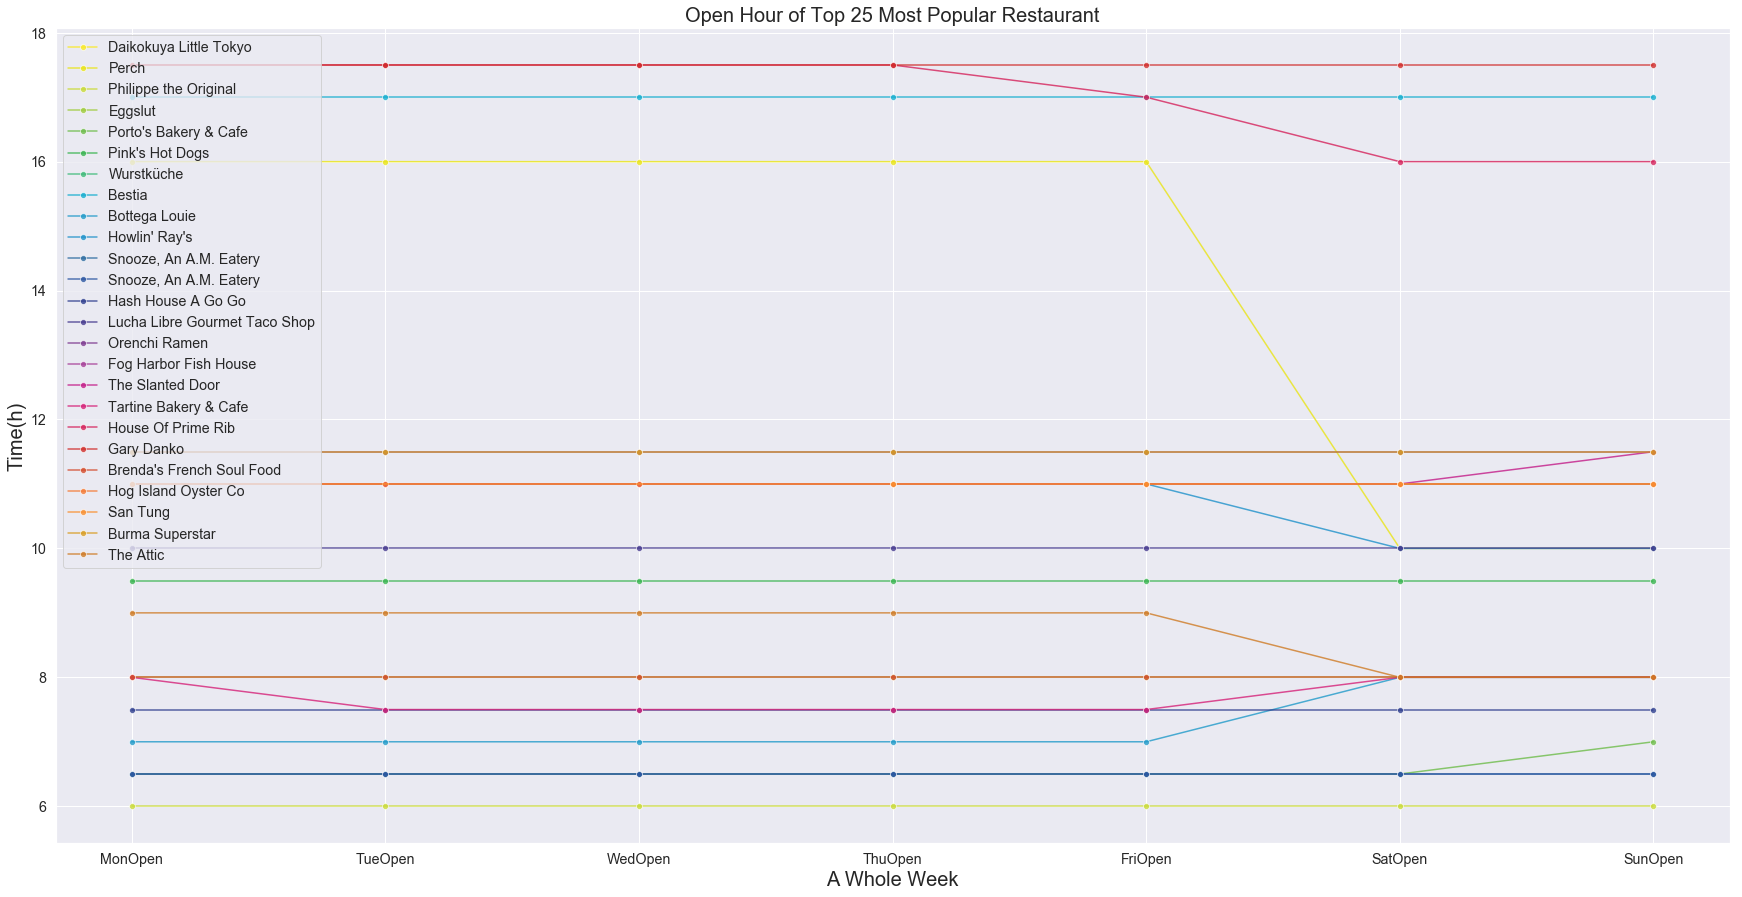

In [43]:
# plot the Open Hour of Top 25 Most Popular Restaurant
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=1.3)

top_choice = yelp_clean_df.iloc[np.where(yelp_clean_df['Name'].apply(ideal_rests_filter))]
open_info = ['MonOpen', 'TueOpen', 'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 'SunOpen']
demo_index = list(top_choice.index)
for i in range(25):
    tmp = list(top_choice['Name'])[i]
    sns.lineplot(x=open_info, \
                 y=list(top_choice.iloc[i][open_info]), \
                 color = color_series[i], \
                 linestyle="-", sort=False, alpha=0.8, marker = 'o', 
                 dashes=False,label=top_choice.iloc[i]['Name'])
plt.title('Open Hour of Top 25 Most Popular Restaurant', fontsize=20)
plt.ylabel('Time(h)', fontsize=20)
plt.xlabel('A Whole Week', fontsize=20)

**Observations and Comments:**

- 1.From the figure above, we could capture some operating strategies and insights of these excellent restaurants based on their open time, which may have close relationships with other features (e.g. category). 
- 2.For instance, `Porto's Bakery & Cafe` opens very early during weekdays and Saturday, but a little bit late on Sundays.
- 3.However, `Perch` opens too late to offer lunch on weekdays, while they could open earlier so that lunches could be offered during weekends.

Text(0.5, 1.0, 'How Price affects Rating Points in Popular Restaurants')

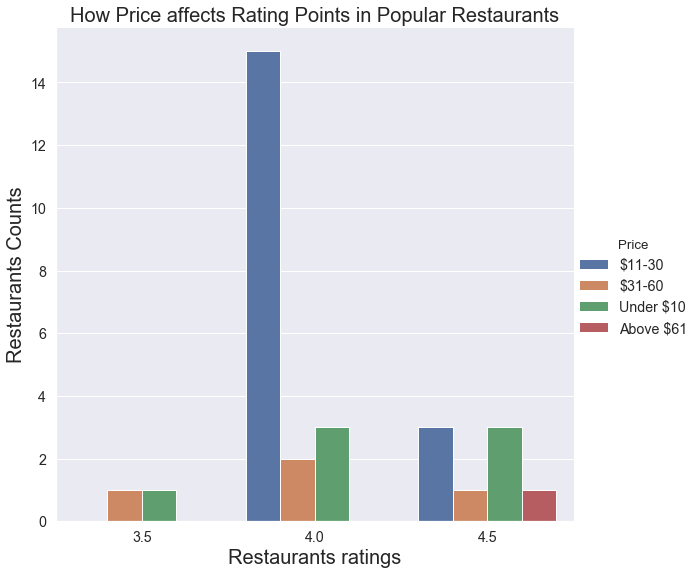

In [44]:
# Bar plot on price and ratings of top 25 restaurants
sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=1.3)
sns.catplot(x = 'Rating', hue='Price', kind = 'count', data=top_choice, height=8, aspect=1)
plt.ylabel('Restaurants Counts', fontsize=20)
plt.xlabel('Restaurants ratings', fontsize=20)
plt.title('How Price affects Rating Points in Popular Restaurants', fontsize=20)

**Observations and Comments:**

From the plot above:
- 1. The overall ratings of these top 25 restaurants had a baseline of 3.5 stars, and majority of them have ratings greater than 4. This is not superise since popularity and ratings should have positive relations. 
- 2. Only one restaurants has price over 60 dollars, and majority of these popular restaurants were have price under 10 dollars and up to 30 dollars. 
- 3. The general property of these top reviewed restaurants: Popular and inexpensive.

### Part V: Restaurants geo-spatial analysis 

In [45]:
# tranferring data into appropriate formats
def intRating(item):
    """ encode all Ratings from mixed type to int
    """
    if item == 'Unknown':
        return 0
    return float(item)

yelp_clean_df['RatingPoints']=yelp_clean_df.Rating.apply(intRating)
ZIP_data = pd.DataFrame(yelp_clean_df.groupby('ZIP')['RatingPoints'].mean())
ZIP_data = ZIP_data.drop('Unknown')
ZIP_data.reset_index().sample(1)

ZIP  RatingPoints
222  92805      4.018987

In [46]:
# read dictionary from online resource
# https://data.world/niccolley/us-zipcode-to-county-state
# add feature: fips 
fips_data = pd.read_csv('../Database/resource_csv/fipsDict.csv', dtype={'ZIP':str,'STCOUNTYFP':str})
scratch = ZIP_data.merge(fips_data, how='left', on='ZIP')
scratch = scratch.dropna()

In [47]:
# get geojson (plot settings)
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
countyFeatures = counties['features']
needCountieFeatures= []
for sample in countyFeatures:
    if sample['properties']['STATE'] == '06':
        needCountieFeatures.append(sample)
plot_counties = {}
plot_counties['type'] = counties['type'] 
plot_counties['features'] = needCountieFeatures

In [48]:
fig = px.choropleth(scratch, geojson=plot_counties, locations='STCOUNTYFP', color='RatingPoints',
                           color_continuous_scale="Viridis",
                           range_color=(0, 5),
                           scope="usa"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Note: If you can't view the User-Interface (UI) image above (which happened several times during our own tests), please refer to the figure below, we saved this image as .png file:**
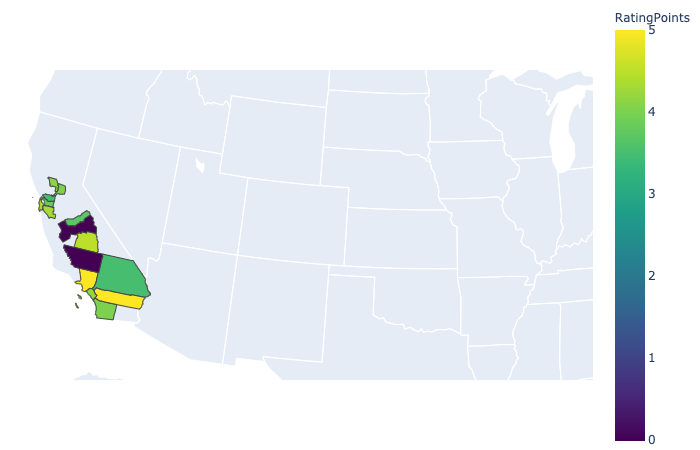

**Observations and Comments:**

From the above geo-spatial analysis:
- 1. There are more than 12 fips codes in this geo-spatial plot, each fips code represents a colored block, but necessarily a city. Thus, we saw two large fips are (Kern County and Fresno County) coding with approximately 0-1 ratings, and this could be explained by limited data cases available in these area, or the reviews were limited in these fips area. 
- 2. It's obvious that south California area (especially Los Angeles and Riverside) has better restaurants ratings than other cities. Other area (except the two area mentioned above) show moderate average ratings. 
- 3. This geo-spatial analysis could be extended to the whole U.S. map, given enough dataset. 

### Part VI: Other categorical variables analysis 

- 1. Relationships between re-featured four parking types versus price levels 
- 2. The relation between two binary variables: take-out and deliverty

Generally, this type of binary variable analysis could be extended to multiple features.

Text(0.5, 1.0, 'The relation between Price and Parking Type Valet')

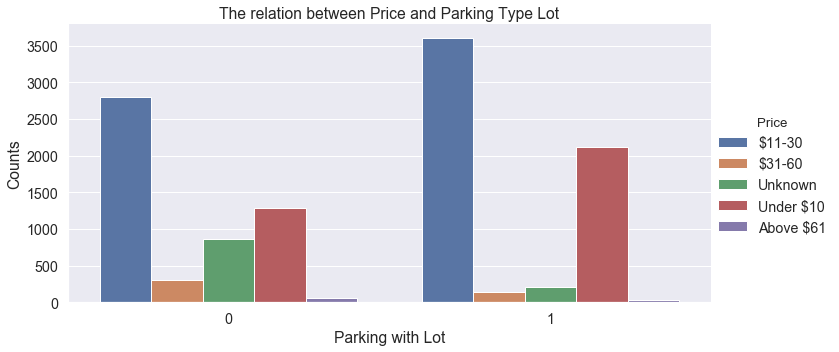

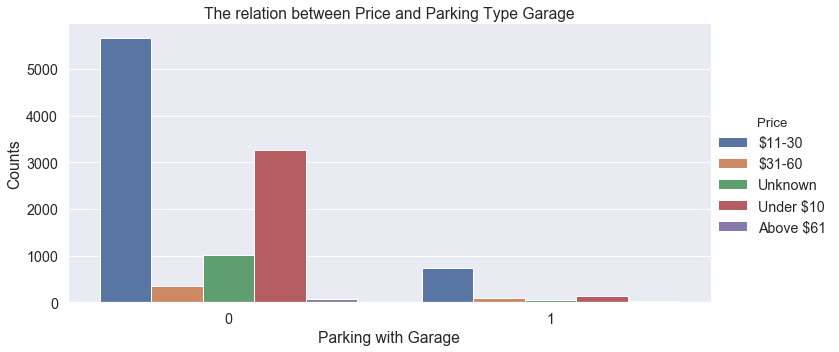

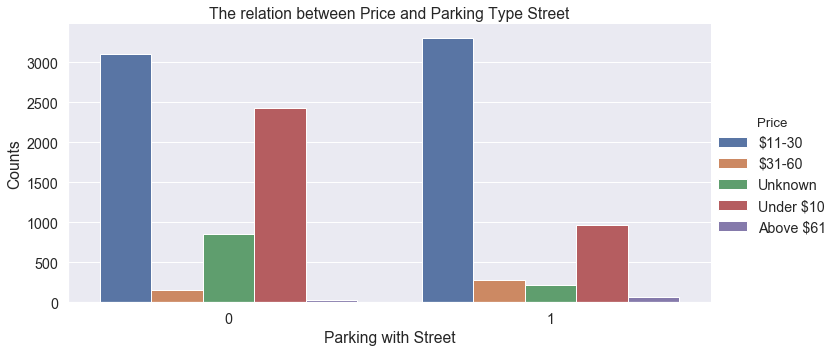

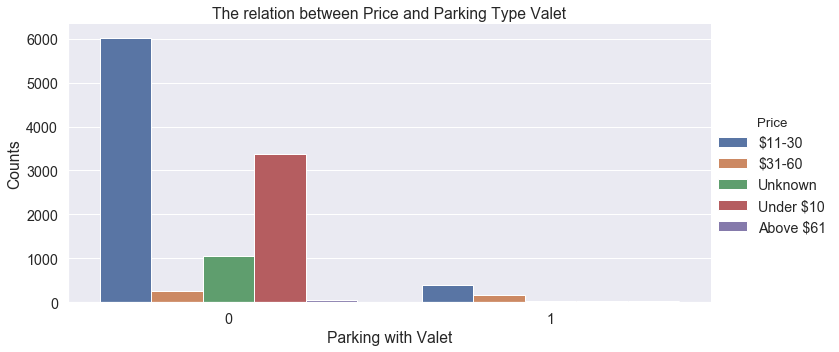

In [49]:
# Relationships between re-featured parking types versus price levels 
sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=1.3)

# The relation between Price and Parking Type Lot
ax = sns.catplot(x='lot', kind='count', hue='Price', aspect=2, data=yelp_clean_df)
plt.xlabel('Parking with Lot')
plt.ylabel('Counts')
plt.title('The relation between Price and Parking Type Lot')

ax = sns.catplot(x='garage', kind='count', hue='Price', aspect=2, data=yelp_clean_df)
plt.xlabel('Parking with Garage')
plt.ylabel('Counts')
plt.title('The relation between Price and Parking Type Garage')

ax = sns.catplot(x='street', kind='count', hue='Price', aspect=2, data=yelp_clean_df)
plt.xlabel('Parking with Street')
plt.ylabel('Counts')
plt.title('The relation between Price and Parking Type Street')

ax = sns.catplot(x='valet', kind='count', hue='Price', aspect=2, data=yelp_clean_df)
plt.xlabel('Parking with Valet')
plt.ylabel('Counts')
plt.title('The relation between Price and Parking Type Valet')

**Observations and Comments:**
- First plot: lot parking option is not sensitive to the influence of price levels 
- Second plot: only a few restaurents offer garage parking option; within the restaurents which offer this type of parking, majority of them have price level 11-30 dollars.
- Third plot: compared with other plots, we observed that more expensive restaurents provide street parking option. 
- Fourth plot: similar to the second plot, the difference is that the restaurents which offer Valet parking option tend to be more expensive than those restaurents which provide garage parking.

Therefore, the relationship between the parking types and price levels is poor / limited.


Text(0.5, 1.0, 'The relation between take-out and deliverty')

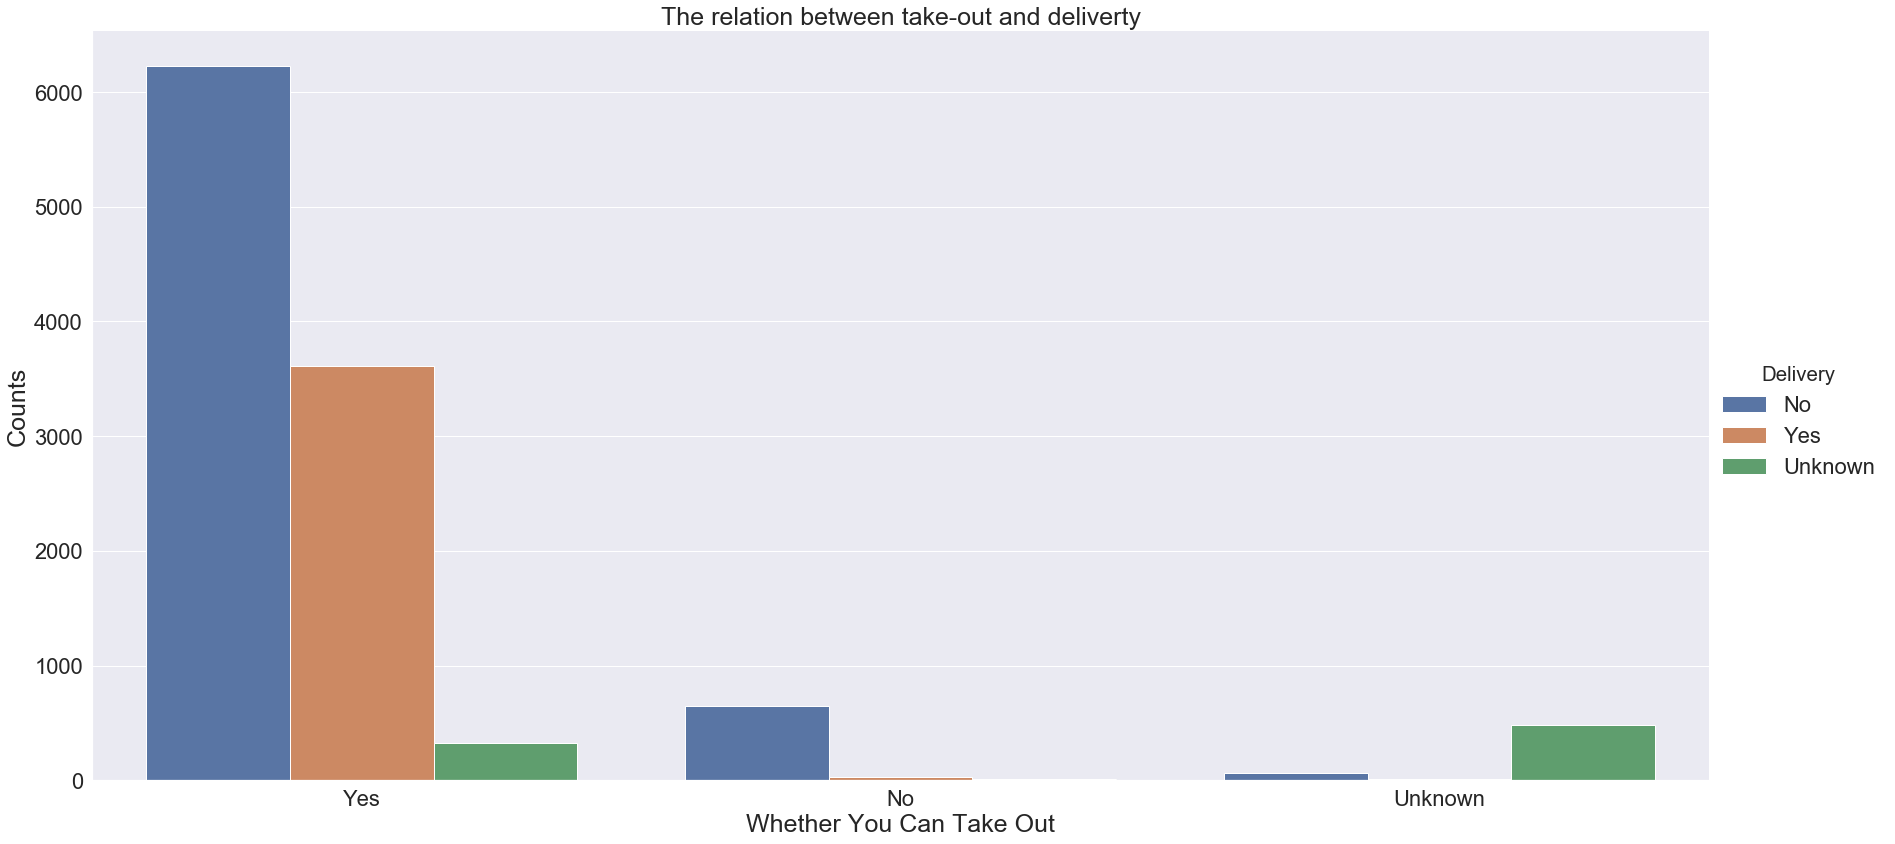

In [50]:
# The relation between take-out and deliverty
sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=2)
ax = sns.catplot(hue='Delivery',kind='count', x='Take_out', height=12, aspect=2, data=yelp_clean_df)
plt.xlabel('Whether You Can Take Out', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.title('The relation between take-out and deliverty', fontsize=25)

**Observations and Comments:**

From the above plot:
- 1. Generally speaking, the restaurents which offer delivery option almostly also tend to offer take-out option.
- 2. Majority restaurents offer take-out option, however, only limited amount of restaurents offer delivery option. 

## Section V: Restaurants rating prediction 

**<span style="color:blue">In this part, please refer `Codebase/helper_ml.py` as helper machine learning codes.</span>**

In this part, we try to find that if we can use some features of the restaurants to predict its rating. The features we considered that would have impact on rating are:

- Price: The average cost of customers in a restaurant.
- Delivery: Whether the restaurant provides delivery service or not.
- Wi-Fi: Whether the restaurant provide Wi-Fi or not, and the service is free or paid.
- Takes_Reservations: Whether the restaurant allow reservations.
- Vegetarian_Options: Whether the restaurant provides vegetarian options
- Accepts_Credit_Cards, Accepts_Apple_Pay, Accepts_Google_Pay: which kind of pay methods is accepted
- Take_out: Whether take-out allowed in the restaurant.
- street, lot, garage, valet: Place for parking.

In [28]:
consider_feature = ['Price', 'Delivery', 'Wi_Fi', 'Takes_Reservations',
                    'Vegetarian_Options', 'Accepts_Credit_Cards', 'Accepts_Apple_Pay',
                    'Accepts_Google_Pay','Take_out', 'street', 'lot', 'garage', 'valet',]
yelp_rate_df = yelp_clean_df[["Rating"] + consider_feature]
print(f'The data frame for predictions: {yelp_rate_df.shape}')
yelp_rate_df.sample(1)

The data frame for predictions: (11404, 14)


Rating      Price Delivery Wi_Fi Takes_Reservations Vegetarian_Options  \
6676    4.0  Under $10      Yes    No                 No                Yes   

     Accepts_Credit_Cards Accepts_Apple_Pay Accepts_Google_Pay Take_out  \
6676                  Yes                No                 No      Yes   

      street  lot  garage  valet  
6676       0    1       0      0

In [29]:
# drop the missing values of the response variable "Rating"
yelp_rate_df = yelp_rate_df[yelp_rate_df["Rating"] != "Unknown"].reset_index(drop=True)
yelp_rate_df["Rating"] = yelp_rate_df["Rating"].astype(str).astype(float)

# show how much missing values each feature has
total_num = yelp_rate_df.shape[0]
for col in yelp_rate_df.columns[1:]:
    value_count = yelp_rate_df[col].value_counts()
    miss_num = value_count["Unknown"] if "Unknown" in value_count.index else 0
    print(f"{col}:".ljust(20), f"{miss_num} missing of total {total_num} records".rjust(45))

Price:                          991 missing of total 11326 records
Delivery:                       767 missing of total 11326 records
Wi_Fi:                         1171 missing of total 11326 records
Takes_Reservations:             791 missing of total 11326 records
Vegetarian_Options:            9049 missing of total 11326 records
Accepts_Credit_Cards:            474 missing of total 11326 records
Accepts_Apple_Pay:             2792 missing of total 11326 records
Accepts_Google_Pay:            5311 missing of total 11326 records
Take_out:                       504 missing of total 11326 records
street:                           0 missing of total 11326 records
lot:                              0 missing of total 11326 records
garage:                           0 missing of total 11326 records
valet:                            0 missing of total 11326 records


From above, we notice that, except "Vegetarian_Options" feature, other features all have a acceptable number of missing values, and we decide to deal with the missing data by creating missingness indicator variables.

In [30]:
yelp_rate_df["Vegetarian_Options"].value_counts()

Unknown    9049
Yes        2277
Name: Vegetarian_Options, dtype: int64

For the feature "Vegetarian_Options", it has 9049 missing data, which means more than 80% of the data are missing. However, if we look at its conponent, we can notice that the feature only has "Yes". It may because the restaurants that do not provide vegetarian options will not show "No" directly on their website. So we decide to deal with the missing value as "No"

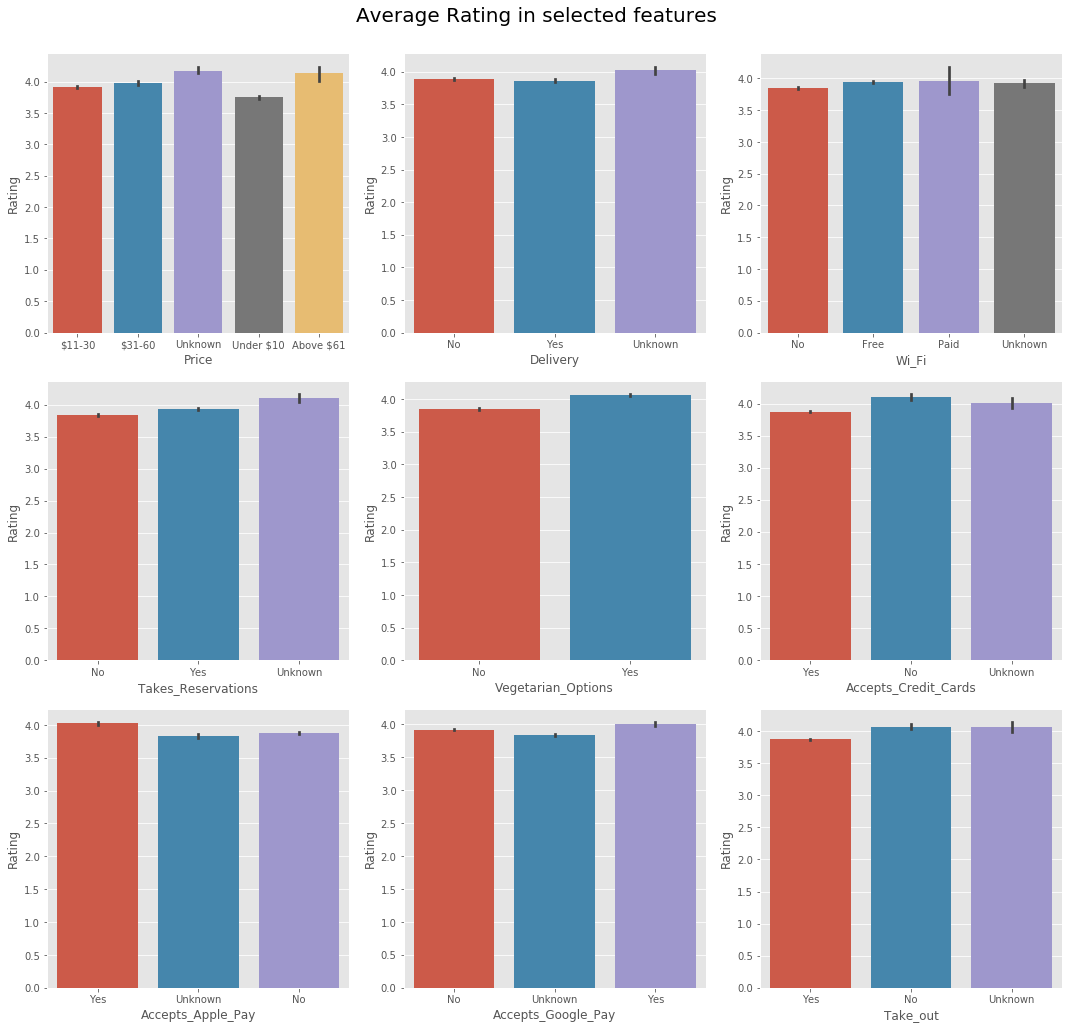

In [31]:
yelp_rate_df["Vegetarian_Options"] = yelp_rate_df["Vegetarian_Options"].apply(lambda
                                                                              x: "No" if x == "Unknown" else x)
f, axes = plt.subplots(3, 3,figsize=(15,15))
for i, feature in enumerate(consider_feature[:9]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//3,i%3])
plt.suptitle("Average Rating in selected features", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

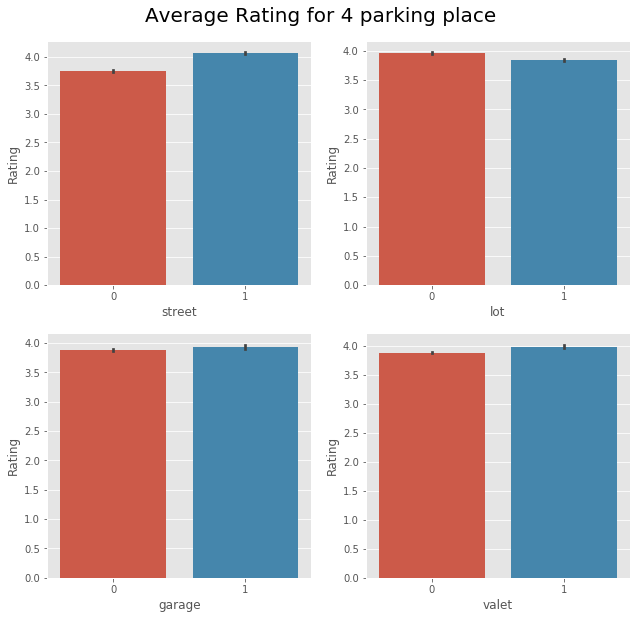

In [32]:
f, axes = plt.subplots(2, 2,figsize=(9,9))
for i, feature in enumerate(consider_feature[9:14]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//2,i%2])
plt.suptitle("Average Rating for 4 parking place", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

For all of the features, we plot the average rating of different groups of each one. We can find there is no obviously difference between the average rating, so use single feature to predict the rating is not a good idea. Then, how about the prediction ability if we combine these features? In the following part, we will show the prediction ability of different algorithm like KNN, SVM, RandomForest and XGBoost.

In [33]:
# create indicator variables for categorical variables and split the dataset into trainset and testset
X = yelp_rate_df.iloc[:,1:]
X = pd.get_dummies(X)
y = yelp_rate_df.iloc[:,0].values
p = X.shape[1]
X_tr,X_te,y_tr,y_te = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 1)

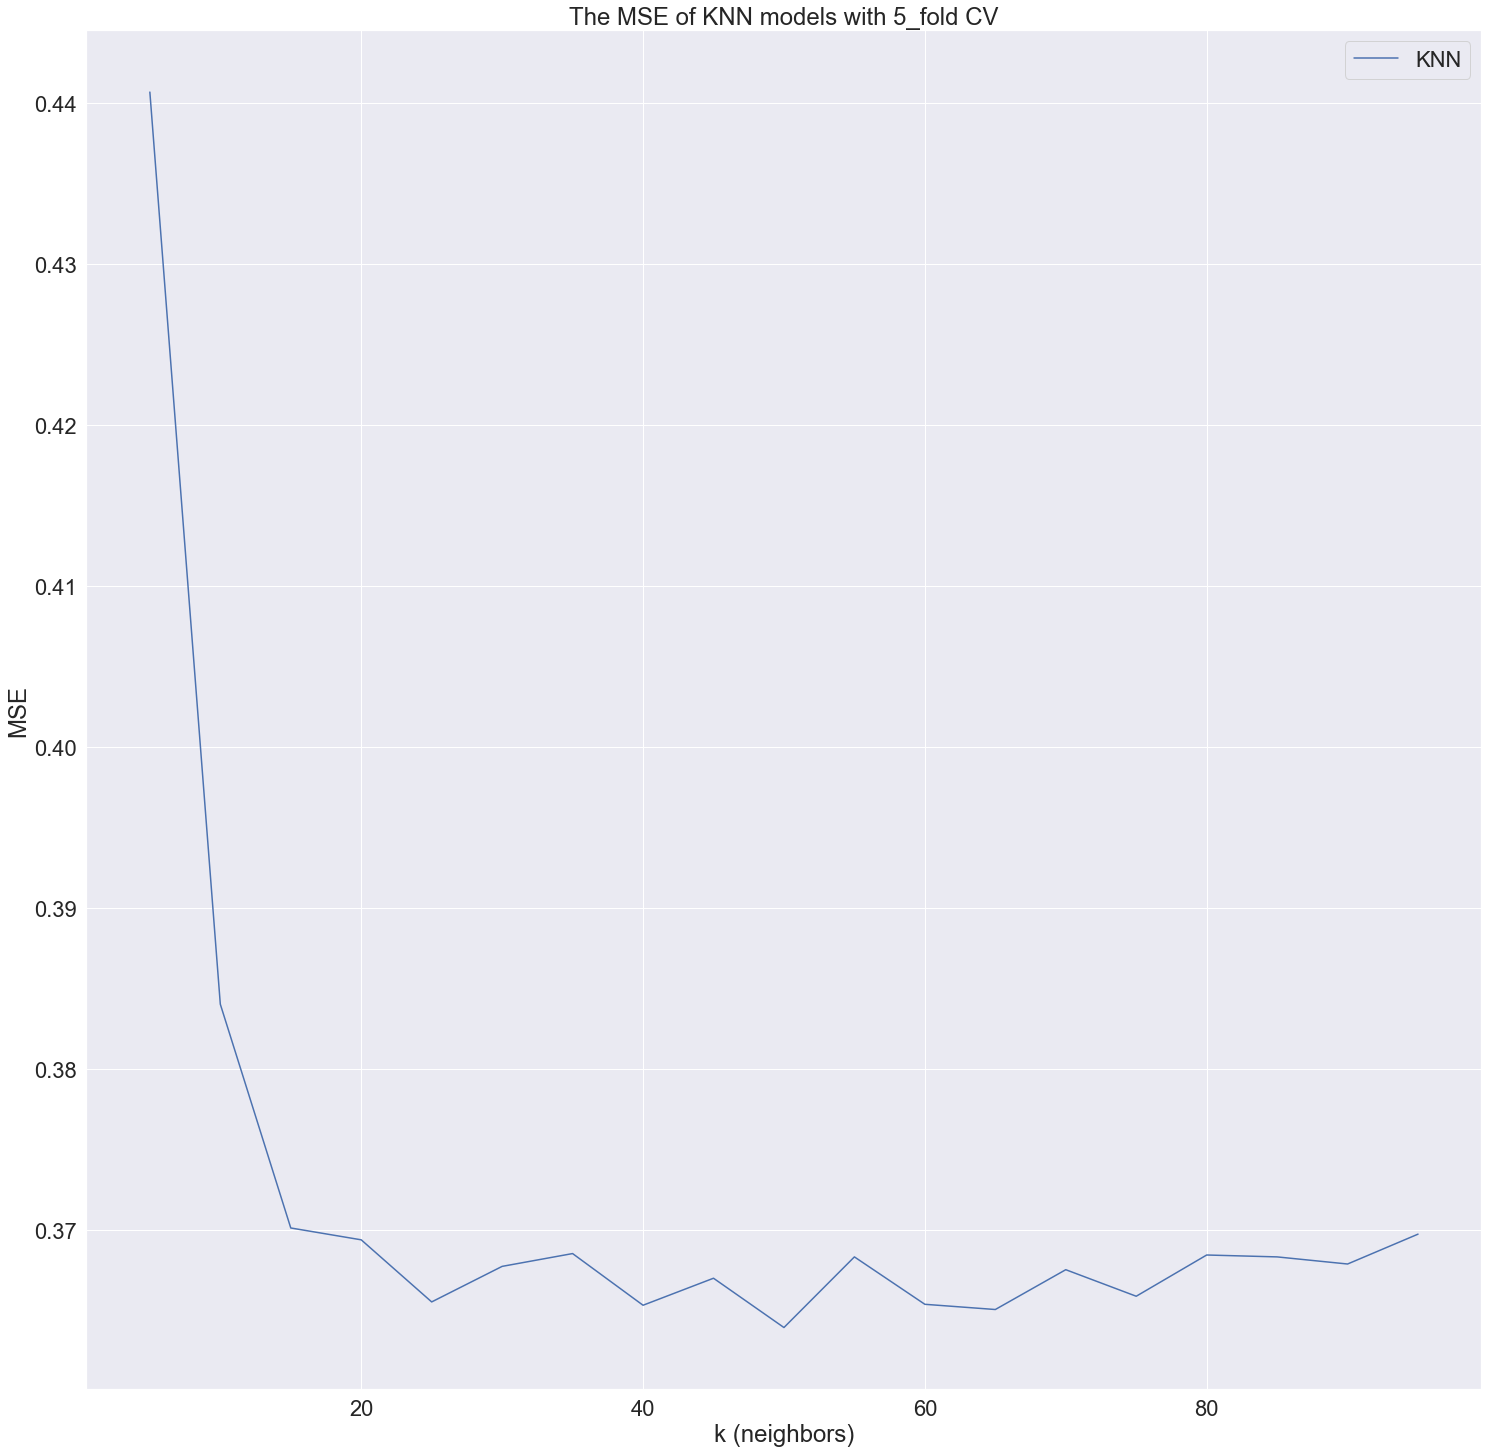

The parameter tuned is 50
KNN: the MSE on the test set is 0.3541666666666667, the R_2 score is 0.14004128877291988
The accurancy is 0.3848870056497175


In [57]:
# Apply KNN model 
KNN_pred = Predictor(range(5,100,5), "KNN")
KNN_pred.fit_and_tune(X_tr, y_tr)
KNN_pred.predict(X_te, y_te)

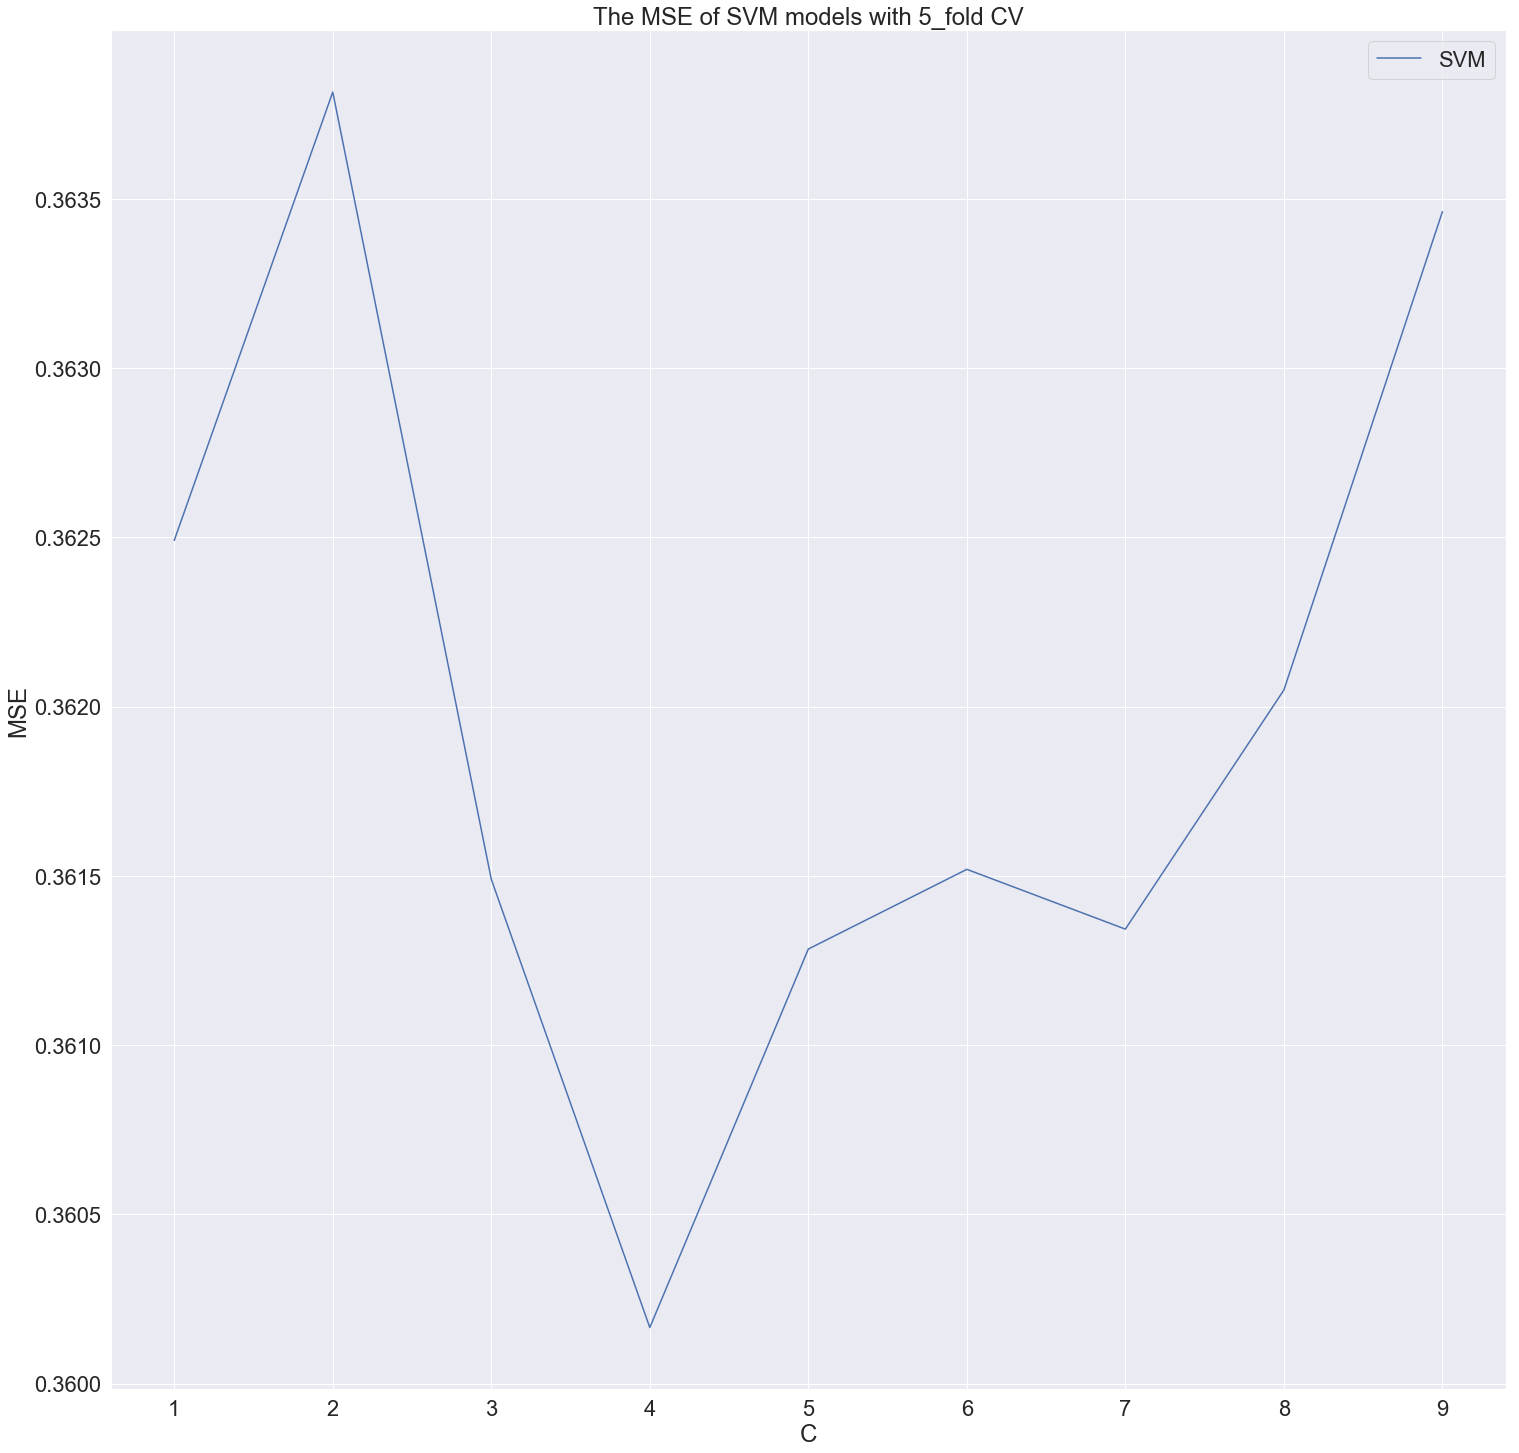

The parameter tuned is 4
SVM: the MSE on the test set is 0.339600988700565, the R_2 score is 0.15856824651641266
The accurancy is 0.4120762711864407


In [58]:
# Apply SVM model
SVM_pred = Predictor(range(1, 10, 1), "SVM")
SVM_pred.fit_and_tune(X_tr, y_tr)
SVM_pred.predict(X_te, y_te)

In [34]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
rf = ensemble.RandomForestRegressor(n_estimators = 100, oob_score= True)
param_grid_rf = {
     'max_depth':[3,5,10,None],
     'max_features':['sqrt','log2',0.1],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,5] 
}
rf_grid = model_selection.GridSearchCV(rf,param_grid_rf, scoring = 'neg_mean_squared_error', cv=5)
rf_grid.fit(X_tr,y_tr)
print('The best params of RandomForest are {}'.format(rf_grid.best_params_))
print('The MSE of the model is {}'.format(-rf_grid.best_score_))

The best params of RandomForest are {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
The MSE of the model is 0.3323447987652632


In [35]:
#fit the final RF model on the trainset
rf_pred = rf_grid.best_estimator_
rf_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(rf_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = rf_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('RF: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

RF: the MSE on the test set is 0.3426906779661017, the R_2 score is 0.17020725551550164
The accurancy is 0.3905367231638418


In [36]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
XGB = xgb.XGBRegressor(objective='reg:squarederror')
param_grid_xgb = {
     'max_depth':[3,5,10],
     'learning_rate':[0.001,0.01,0.1],
     'subsample':[0.5,0.8],
}
XGB_grid = model_selection.GridSearchCV(XGB,param_grid_xgb,scoring = 'neg_mean_squared_error',cv=5)
XGB_grid.fit(X_tr,y_tr)
print('The best params of XGBoost are {}'.format(XGB_grid.best_params_))
print('The MSE of the model is {}'.format(-XGB_grid.best_score_))

The best params of XGBoost are {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
The MSE of the model is 0.33554571382775955


In [37]:
#fit the final XGB model on the trainset
XGB_pred = XGB_grid.best_estimator_
XGB_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(XGB_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = XGB_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('XGB: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

XGB: the MSE on the test set is 0.345603813559322, the R_2 score is 0.17230765454392216
The accurancy is 0.3838276836158192


All of the four models shows a poor ability to predict the rating of the restaurant based on the selected features. The SVM model have the highest accuracy with only 41.2%, while the XGBoost model have the highest $R^2$ score 0.17230765454392216. This tells us that those selected features can not provide enough information for us to judge the level of the restaurant. This is reasonable as people usually tend to rate the restaurant based on the quality of the service and the taste of the food it provides, which those features can not tell us.

So, what about the influence of categories on the rating? Can we improve these models if we take the categories into consideration? To find the answer, wo select the top 30 categories as new features.

In [41]:
catfre_df = pd.DataFrame(category_plot.cat_frequency.items(), columns=['Word_Category', 'Frequency'])
catfre_df = catfre_df.sort_values('Frequency', ascending=False)
cat_top = catfre_df["Word_Category"][:30].values
categories = yelp_clean_df["Category"].apply(lambda x: [c.strip() for c in re.split(category_plot.pattern, x)])
for cat in cat_top:
    yelp_rate_df[cat] = categories.apply(lambda x: 1 if cat in x else 0)

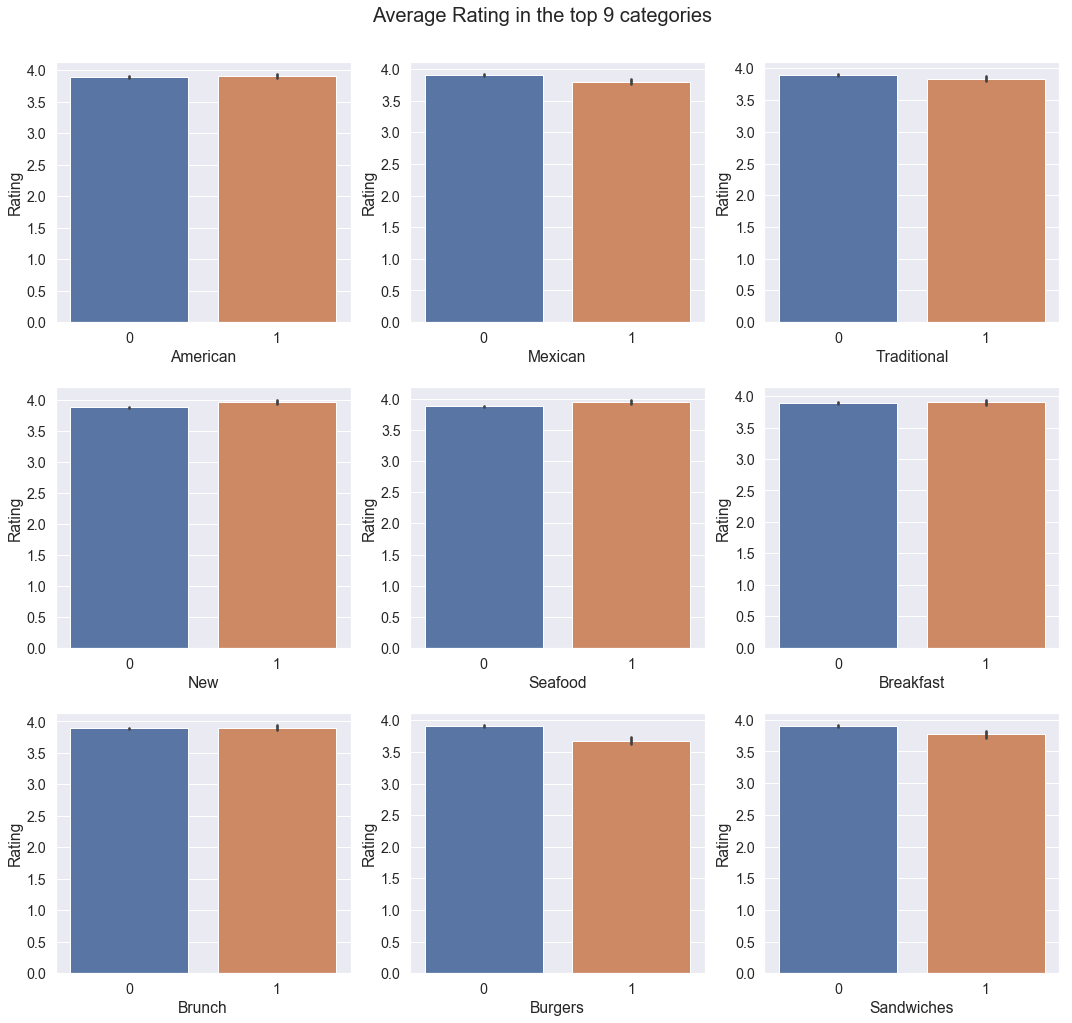

In [42]:
f, axes = plt.subplots(3, 3,figsize=(15,15))
for i, feature in enumerate(cat_top[:9]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//3,i%3])
plt.suptitle("Average Rating in the top 9 categories", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot above shows that there may exist some relationships between the rating and categories. For example, fast food restaurants with "Burgers" and "Sandwiches" labels tend to have a little bit lower rating than others, and seafood restaurant may get a higher rating, one possible reason may be that fast food restauranta are usually more crowded than others and there are no waiters to provide service. To corroborate our conjecture, we retrain the four models with these new features in the following part.

In [43]:
# create indicator variables for categorical variables and split the dataset into trainset and testset
X = yelp_rate_df.iloc[:,1:]
X = pd.get_dummies(X)
y = yelp_rate_df.iloc[:,0].values
p = X.shape[1]
X_tr,X_te,y_tr,y_te = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 1)

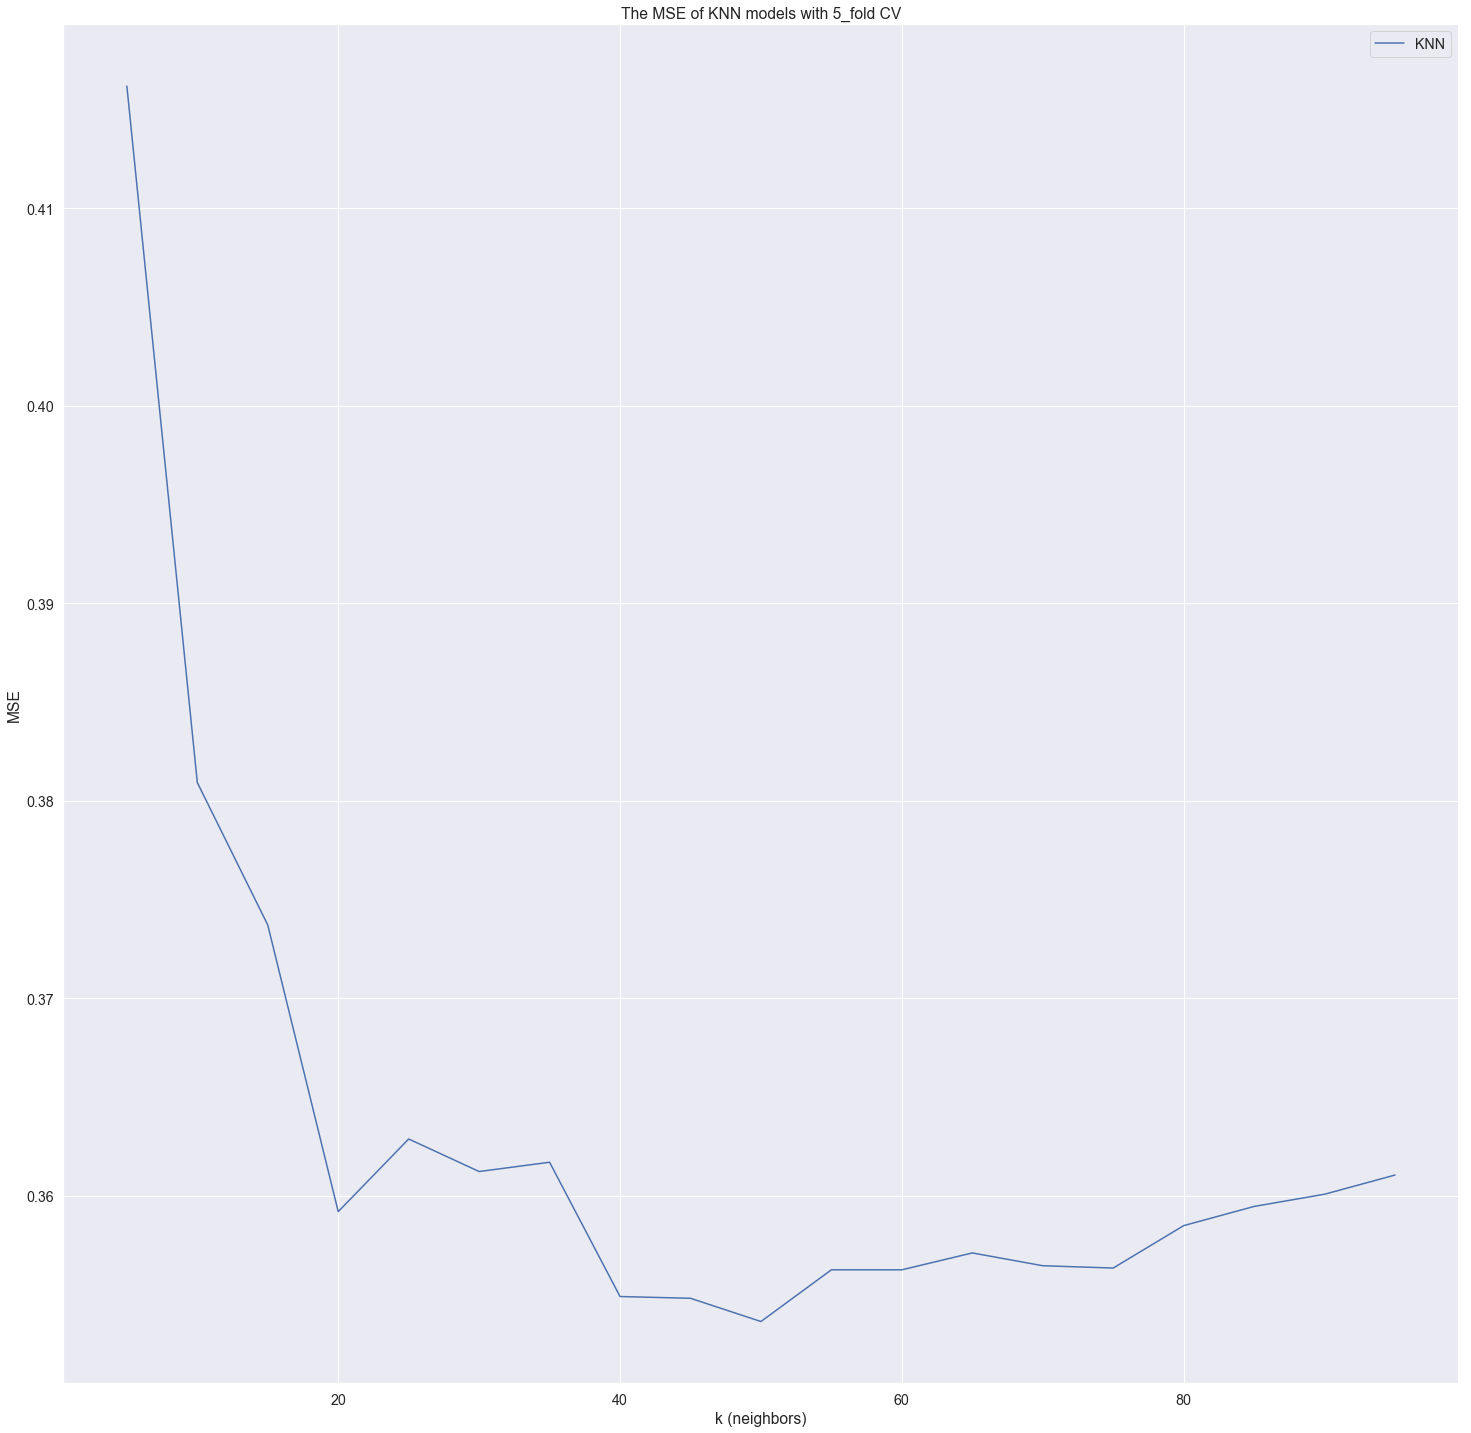

The parameter tuned is 50
KNN: the MSE on the test set is 0.341896186440678, the R_2 score is 0.15910148343171526
The accurancy is 0.3908898305084746


In [44]:
KNN_pred = Predictor(range(5,100,5), "KNN")
KNN_pred.fit_and_tune(X_tr, y_tr)
KNN_pred.predict(X_te, y_te)

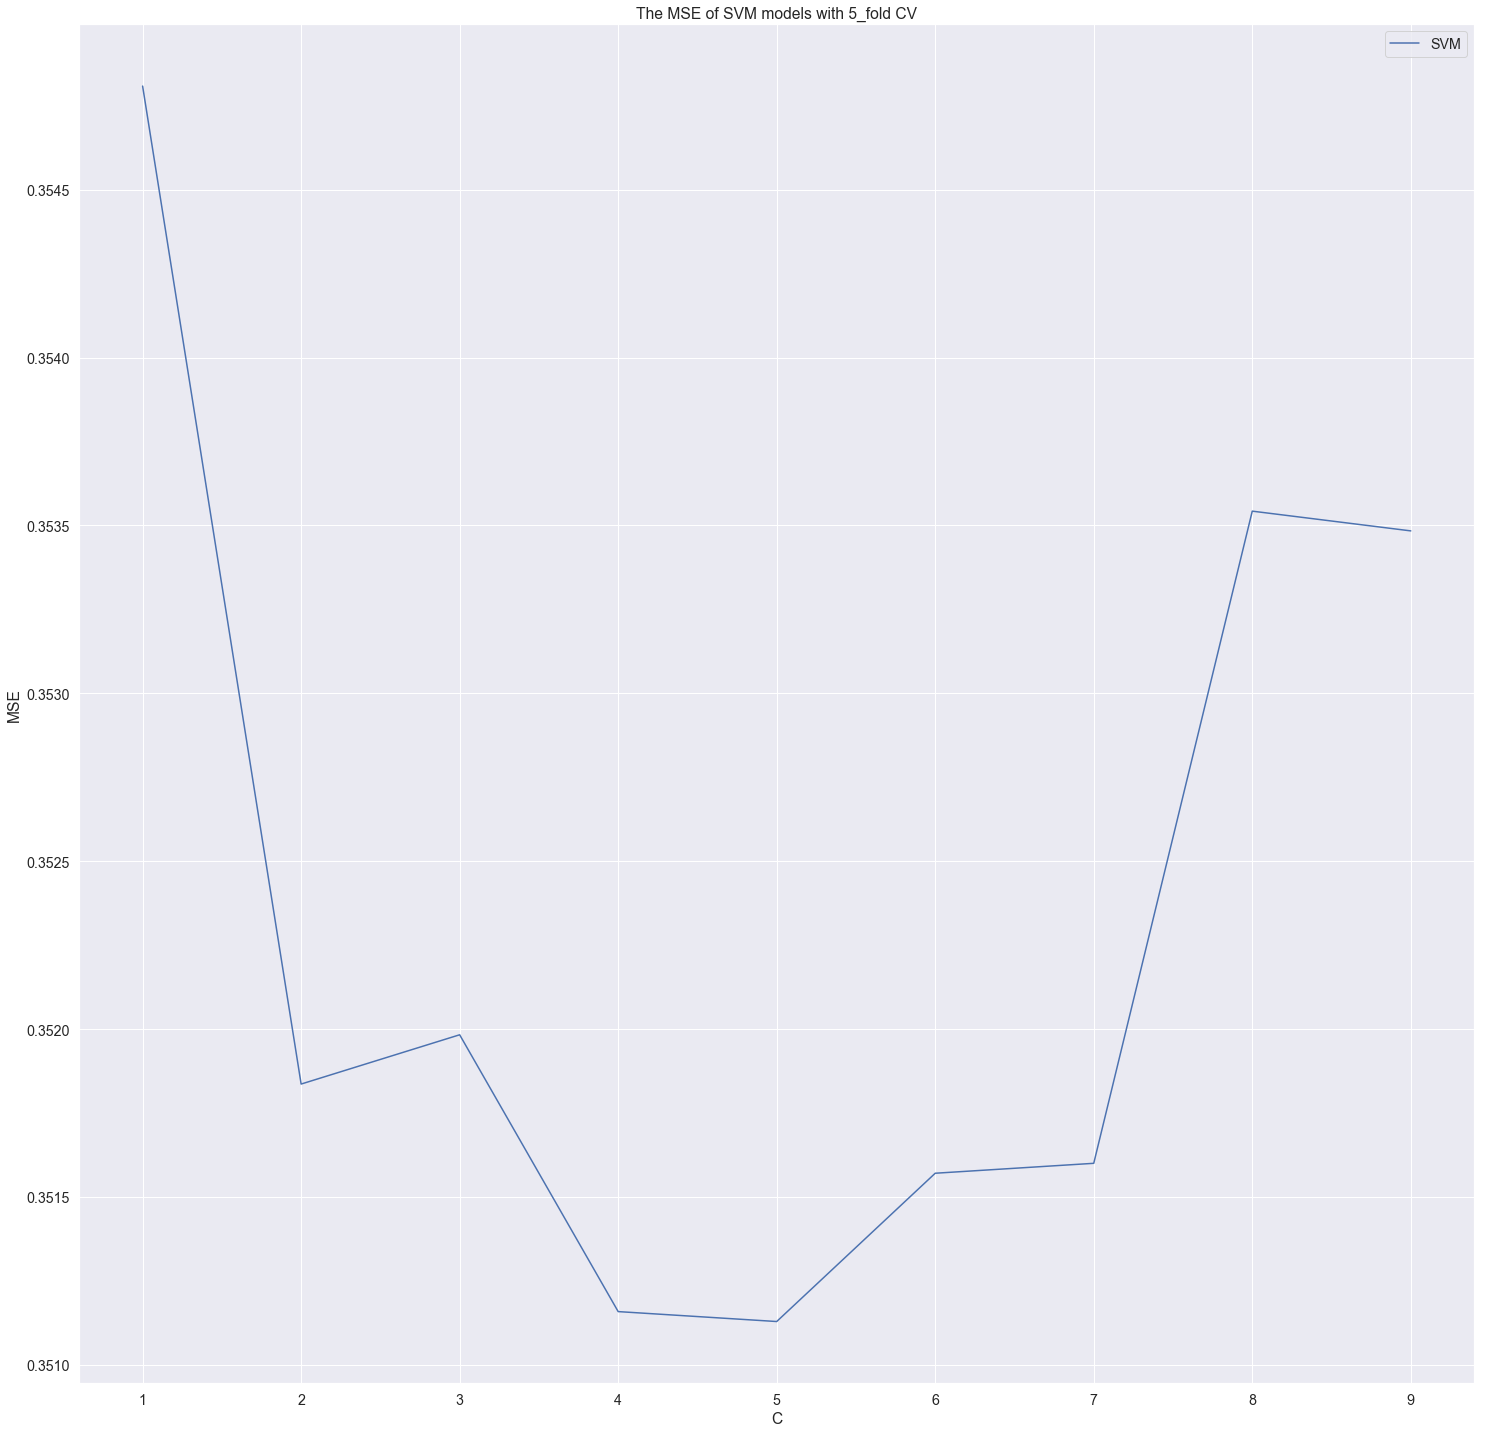

The parameter tuned is 5
SVM: the MSE on the test set is 0.3363347457627119, the R_2 score is 0.17868185131689485
The accurancy is 0.4053672316384181


In [45]:
SVM_pred = Predictor(range(1, 10, 1), "SVM")
SVM_pred.fit_and_tune(X_tr, y_tr)
SVM_pred.predict(X_te, y_te)

In [46]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
rf = ensemble.RandomForestRegressor(n_estimators = 100, oob_score= True)
param_grid_rf = {
     'max_depth':[3,5,10,None],
     'max_features':['sqrt','log2',0.1],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,5] 
}
rf_grid = model_selection.GridSearchCV(rf,param_grid_rf, scoring = 'neg_mean_squared_error', cv=5)
rf_grid.fit(X_tr,y_tr)
print('The best params of RandomForest are {}'.format(rf_grid.best_params_))
print('The MSE of the model is {}'.format(-rf_grid.best_score_))

The best params of RandomForest are {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10}
The MSE of the model is 0.3242677258568883


In [47]:
#fit the final RF model on the trainset
rf_pred = rf_grid.best_estimator_
rf_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(rf_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = rf_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('RF: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

RF: the MSE on the test set is 0.3293608757062147, the R_2 score is 0.19353891180249694
The accurancy is 0.3975988700564972


In [48]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
XGB = xgb.XGBRegressor(objective='reg:squarederror')
param_grid_xgb = {
     'max_depth':[3,5,10],
     'learning_rate':[0.001,0.01,0.1],
     'subsample':[0.5,0.8],
}
XGB_grid = model_selection.GridSearchCV(XGB,param_grid_xgb,scoring = 'neg_mean_squared_error',cv=5)
XGB_grid.fit(X_tr,y_tr)
print('The best params of XGBoost are {}'.format(XGB_grid.best_params_))
print('The MSE of the model is {}'.format(-XGB_grid.best_score_))

The best params of XGBoost are {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}
The MSE of the model is 0.3266477048075309


In [49]:
#fit the final XGB model on the trainset
XGB_pred = XGB_grid.best_estimator_
XGB_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(XGB_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = XGB_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('XGB: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

XGB: the MSE on the test set is 0.3346574858757062, the R_2 score is 0.1896736238554434
The accurancy is 0.393361581920904


The ability of prediction is still poor, with the highest accuracy 40.5% of SVM model and the highest $R^2$ 0.19313380664373658 of RandomForest model. However, we can also observe that all of the four models have a lower MSE and a higher $R^2$ score than before, which means the categories actually contain some information about people's preference.

## Section VI: Future works 

As the categories and amenities of the restaurants can not give us enough information about the quality of service and taste of food the restaurant provide to help us predict the its rating, taking other data into consideration is necessary. In our idea, Customers' reviews may be a reasonable choice, which usually contains their evaluations of the service and food. 
We have already crawled the reviews of all restaurants in Davis and San Francisco, which have 45662 and 885283 records respectively. The data of davis is stored in the 'davis_reviews.csv' while the data of san francisco is so large (near 700 Mb) that we do not upload. 
For future work, we plan to do some research on these data, like natural language processing and semantic analysis, and then use them to make a better prediction of the rating.